# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for splitting data
from sklearn.model_selection import train_test_split



## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
# Importing the file porter_data_1.csv

# google colab upload document

from google.colab import files
uploaded = files.upload()

# import csv file
df = pd.read_csv('porter_data_1.csv')

Saving porter_data_1.csv to porter_data_1.csv


In [3]:
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [4]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [5]:
# Convert categorical features to category type

df['market_id'] = df['market_id'].astype('category')
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [6]:
# Calculate time taken in minutes
df['time_taken_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken_minutes  
0                      21.0     34.44                47.0  
1                       2.0     27.60                44.0  
2                      18.0     11.56                55.0  
3                       8.0     31.80                59.0  
4                       7.0      8.20                46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [7]:
# Extract the hour and day of week from the 'created_at' timestamp

df['order_hour'] = df['created_at'].dt.hour
df['order_day_of_week'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = np.where(df['order_day_of_week'].isin([5, 6]), 1, 0)
df.head()



market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken_minutes  order_hour  \
0                      21.0     34.44                47.0          22   
1                       2.0     27.60                44.0          21   
2                      18.0     11.56                55.0           0   
3                       8.0     31.80                59.0           3   
4                       7.0      8.20                46.0           2   

   order_day_of_week  isWeekend  
0                  4          0  
1                  1          0  
2                  0          0  
3                  3          0  
4                  1          0

In [8]:
# Drop unnecessary columns
df.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)
df.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  time_taken_minutes  \
0                14.0                      21.0     34.44                47.0   
1                 2.0                       2.0     27.60                44.0   
2                 6.0                      18.0     11.56                55.0   
3                 6.0                       8.0     31.80                59.0   
4                 5.0                       7.0      8.20                46.0   

   order_hour  order_day_of_week  isWeekend  
0          22                  4          0  
1          21                  1          0  
2           0                  0          0  
3           3                  3          0  
4           2                  1          0

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [9]:
# Define target variable (y) and features (X)

X = df[['time_taken_minutes']]

y = df['distance']

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [11]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_cols = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'time_taken_minutes']
categorical_cols = ['market_id', 'store_primary_category', 'order_protocol', 'order_hour', 'order_day_of_week', 'isWeekend']

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

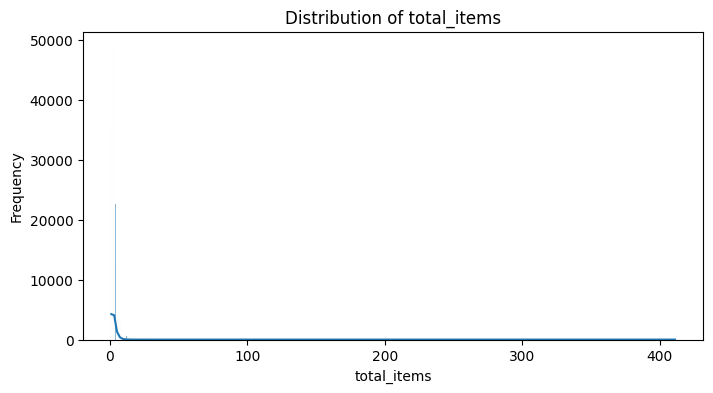

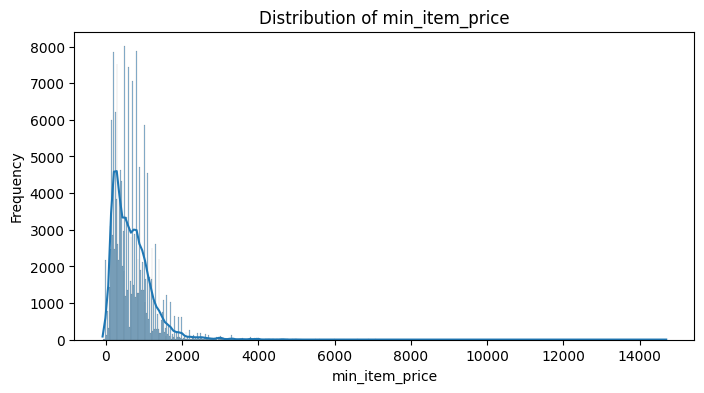

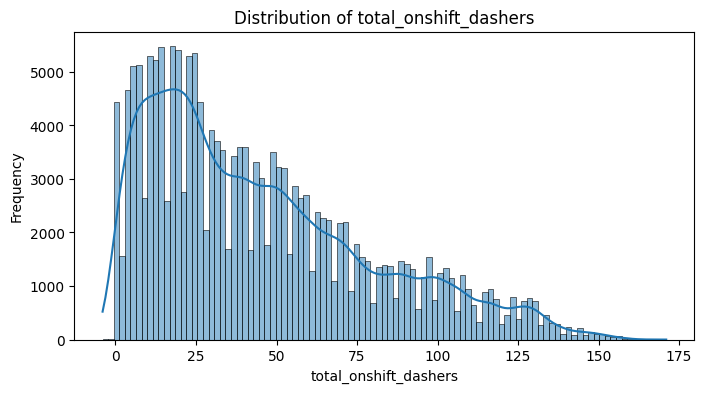

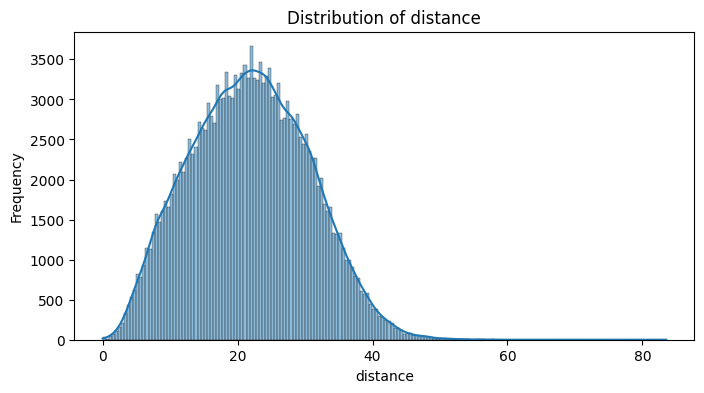

In [12]:
# Plot distributions for all numerical columns

df_train = pd.concat([X_train, y_train], axis=1)
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    # Use the df_train_eda DataFrame which contains all original columns for the training set
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

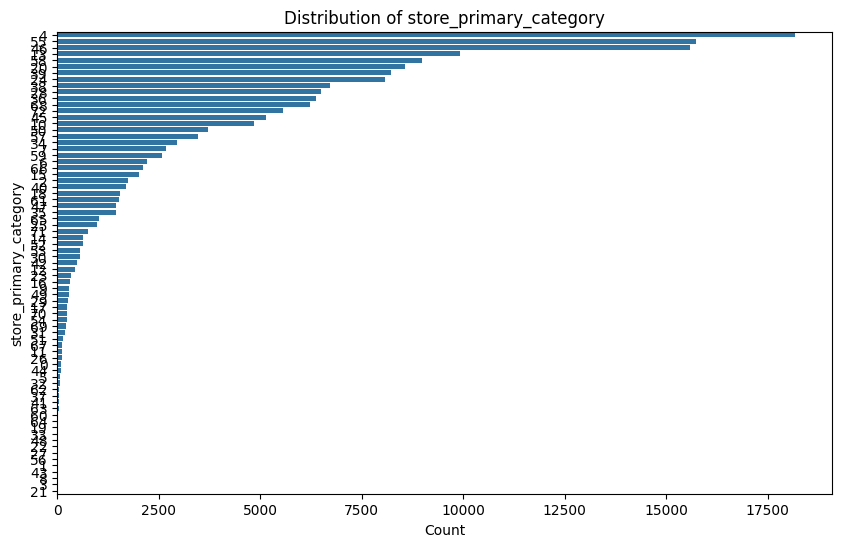

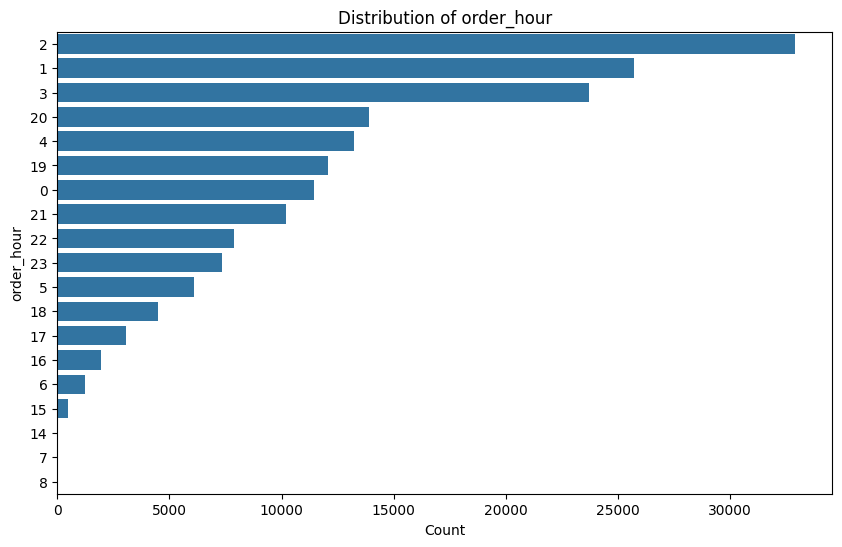

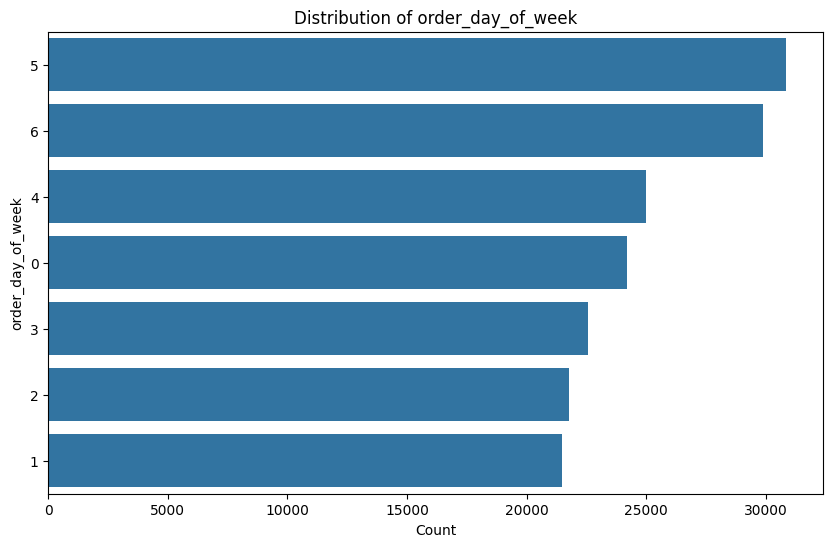

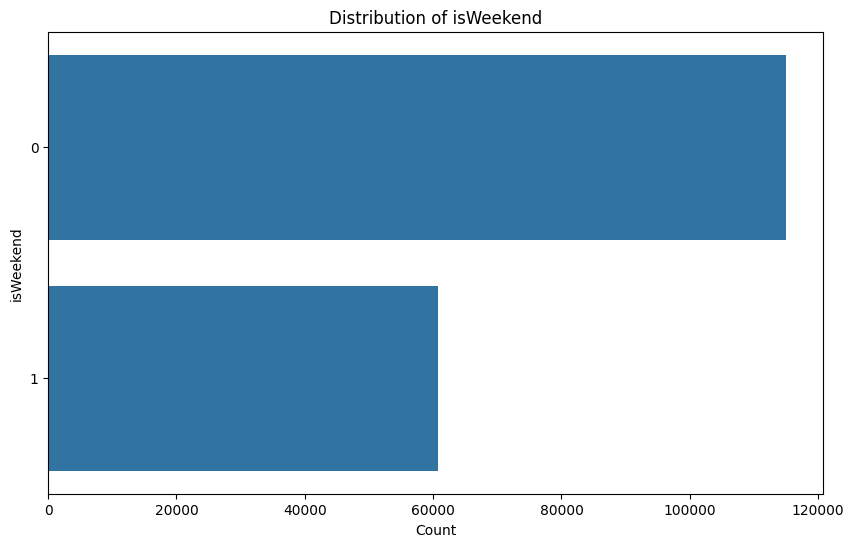

In [13]:
# Distribution of categorical columns

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

In [14]:
# Distribution of time_taken

plt.figure(figsize=(10, 6))
sns.histplot(df['time_taken_minutes'], kde=True, bins=50)
plt.title('Distribution of time_taken_minutes')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

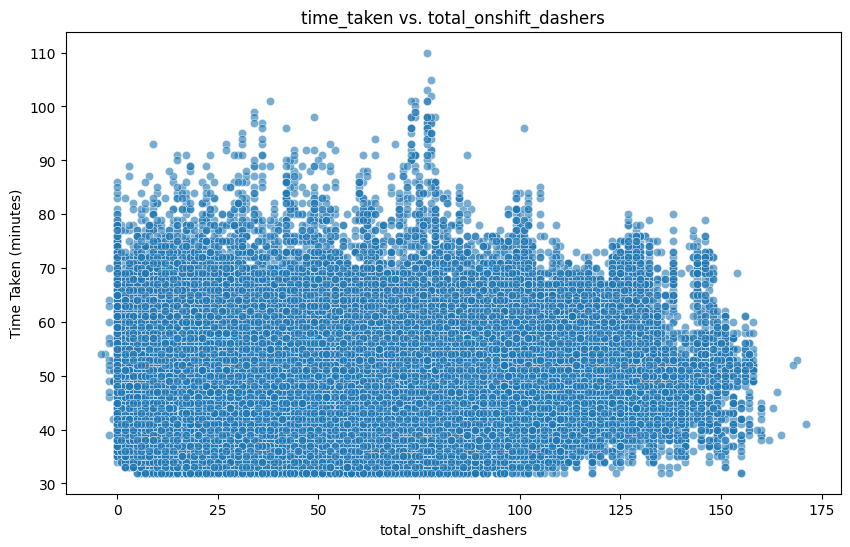

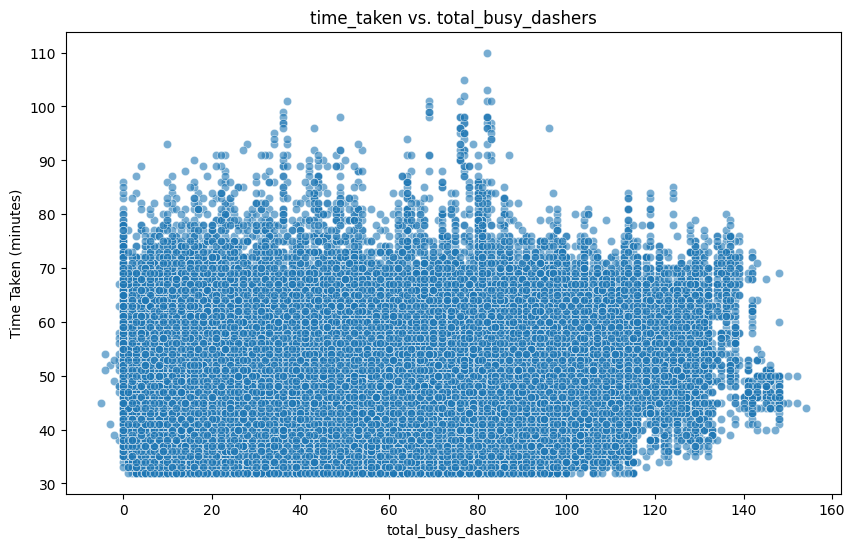

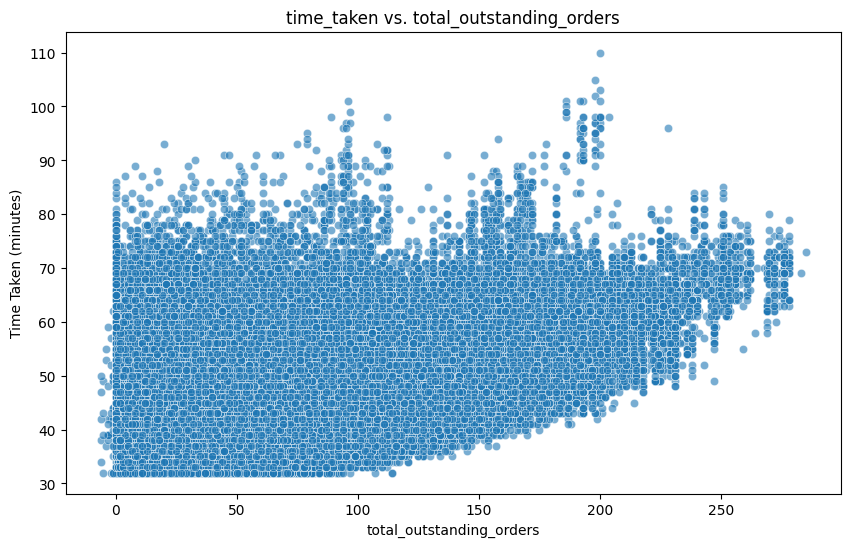

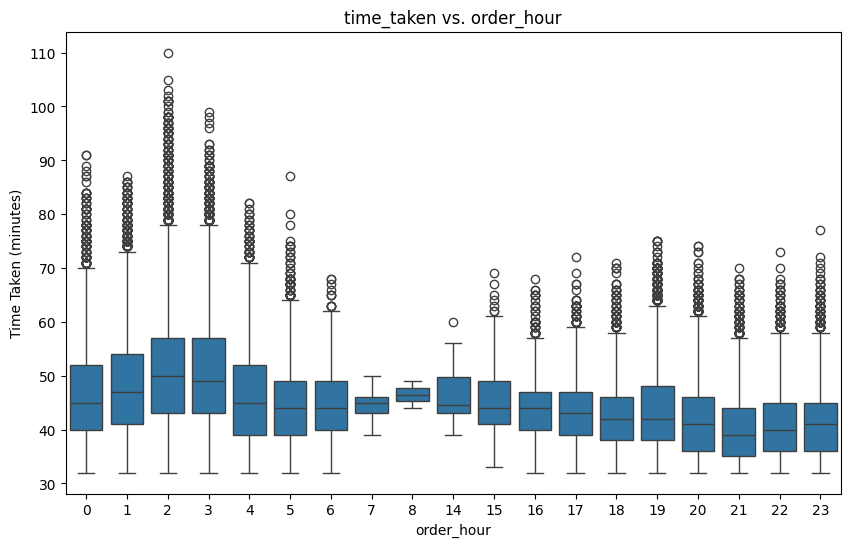

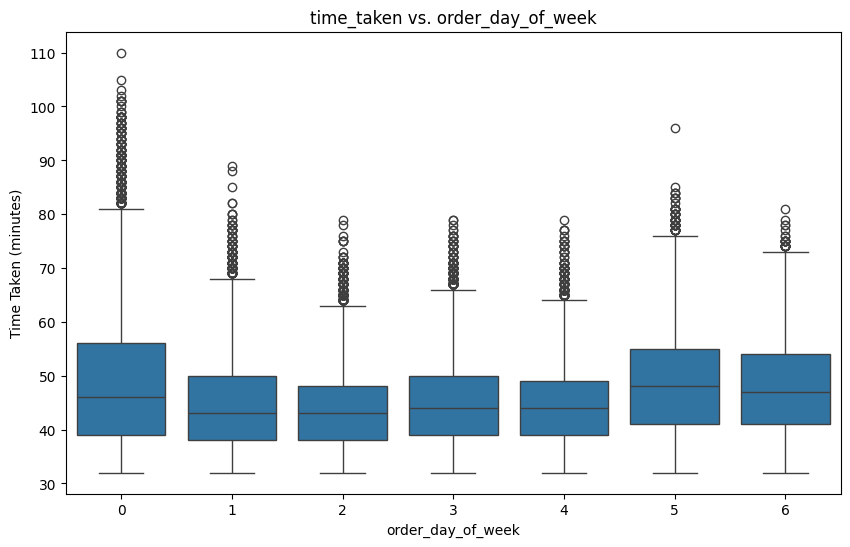

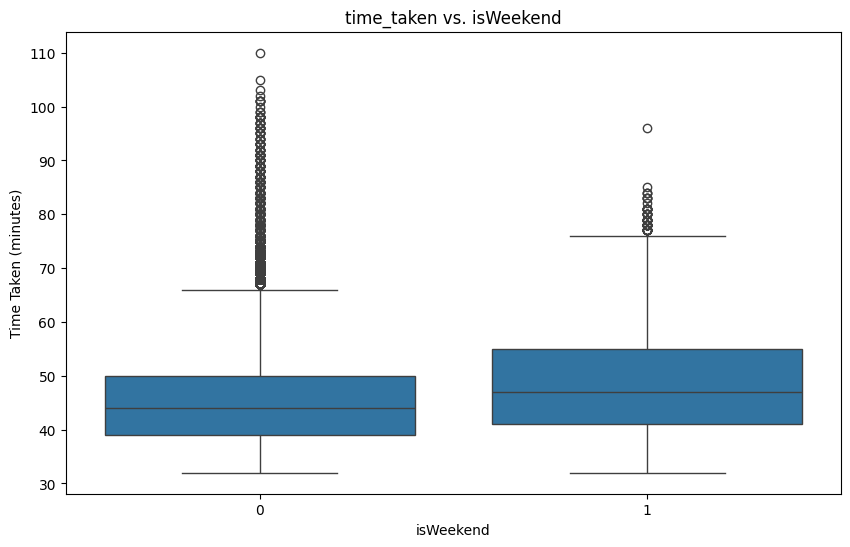

In [15]:
# Scatter plot to visualise the relationship between time_taken and other features
for col in ['subtotal', 'distance', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders']:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=col, y='time_taken_minutes', alpha=0.6)
    plt.title(f'time_taken vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Time Taken (minutes)')
    plt.show()

for col in ['order_hour', 'order_day_of_week', 'isWeekend']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=col, y='time_taken_minutes')
    plt.title(f'time_taken vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Time Taken (minutes)')
    plt.show()


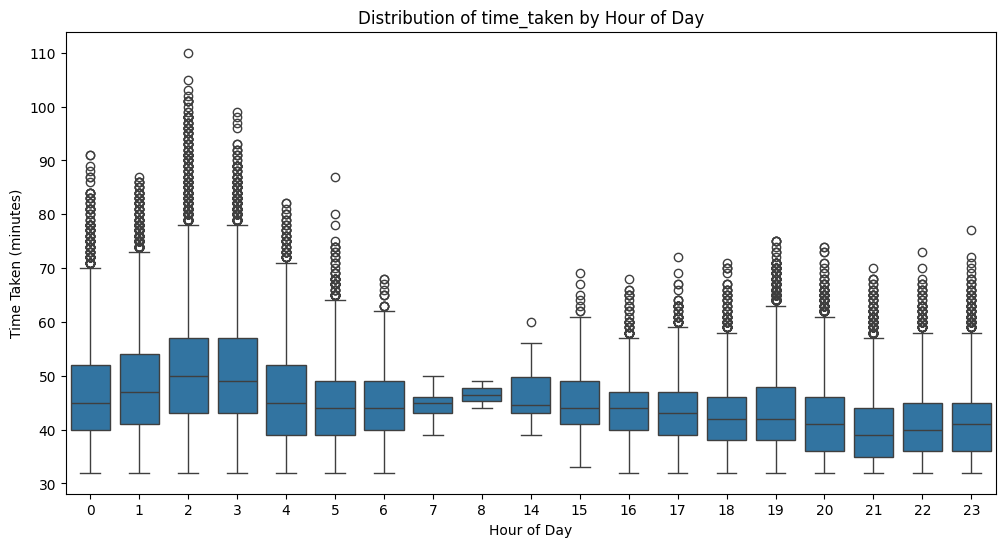

In [16]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='order_hour', y='time_taken_minutes')
plt.title('Distribution of time_taken by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Time Taken (minutes)')
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

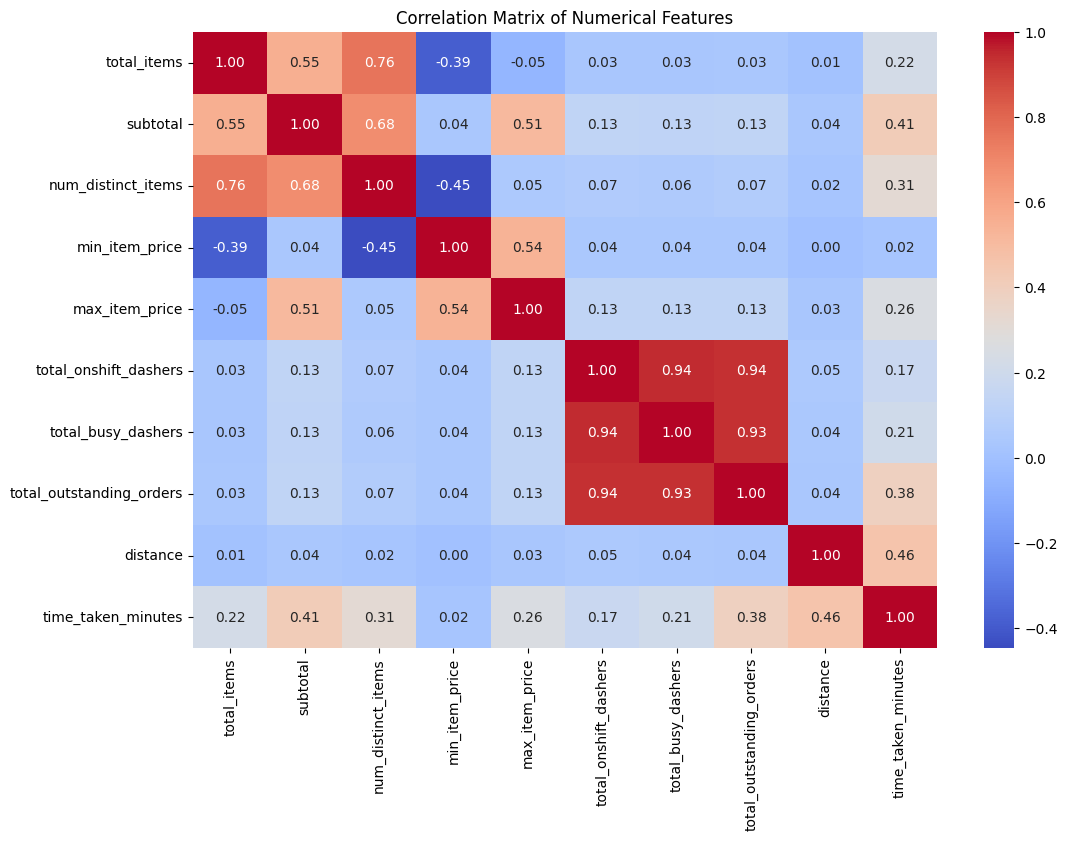

In [17]:
# Plot the heatmap of the correlation matrix

plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [18]:
# Drop 3-5 weakly correlated columns from training dataset

# Identify columns with weak correlation to 'time_taken_minutes'
correlation_with_target = correlation_matrix['time_taken_minutes'].sort_values(key=abs)

# Select columns to drop based on low absolute correlation (e.g., less than 0.1 or based on visual inspection of the heatmap)
# Let's select 3-5 columns that appear to have weak correlation from the printed correlation_with_target
# Based on the heatmap and correlation_with_target, let's choose 'min_item_price', 'num_distinct_items', 'total_items' as weakly correlated.
columns_to_drop = ['min_item_price', 'num_distinct_items', 'total_items']

# Drop the identified columns from the training DataFrame
# Make sure to drop from both X_train and X_test to maintain consistency
X_train = X_train.drop(columns=columns_to_drop, errors='ignore')
X_test = X_test.drop(columns=columns_to_drop, errors='ignore')

print(f"Dropped columns: {columns_to_drop}")
print("\nTraining data after dropping columns:")
print(X_train.head())
print("\nTesting data after dropping columns:")
print(X_test.head())

Dropped columns: ['min_item_price', 'num_distinct_items', 'total_items']

Training data after dropping columns:
        time_taken_minutes
102712                45.0
94576                 43.0
49784                 46.0
37753                 51.0
91728                 37.0

Testing data after dropping columns:
       time_taken_minutes
50609                50.0
49181                69.0
4526                 41.0
131                  45.0
57096                40.0


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

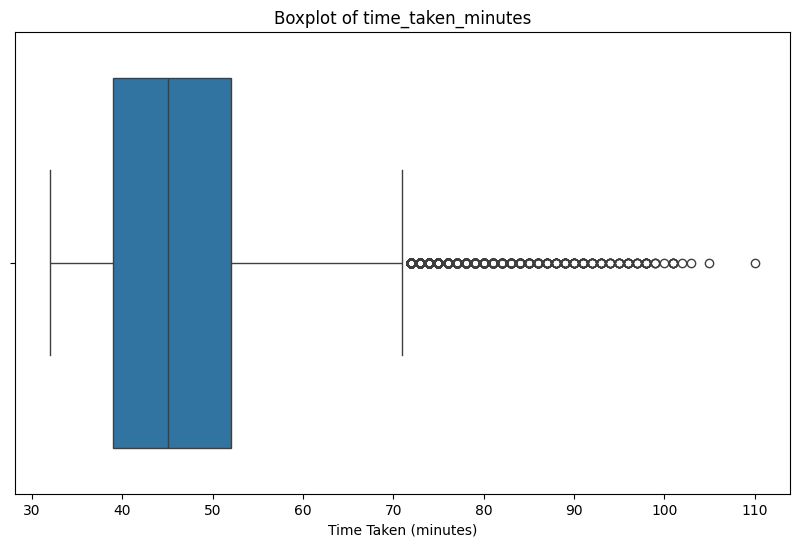

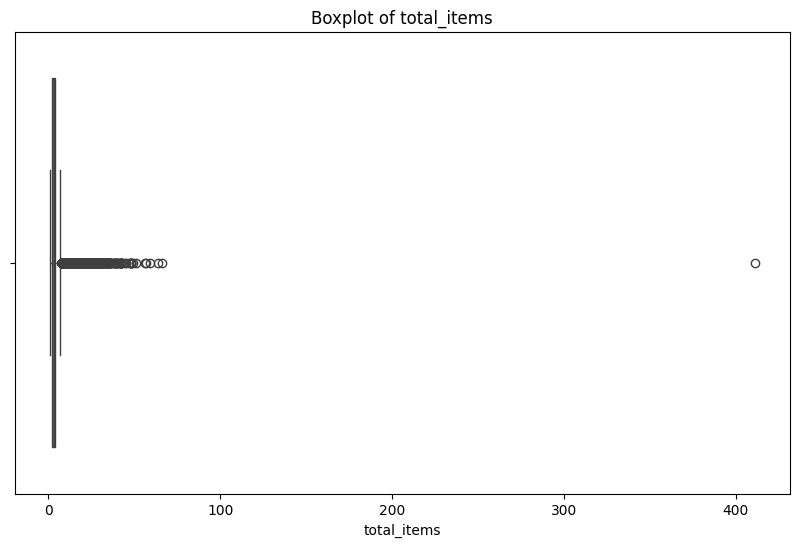

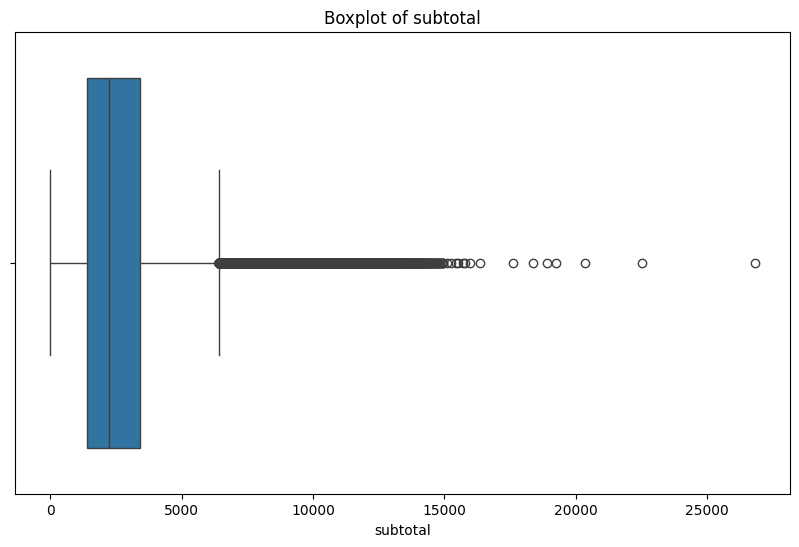

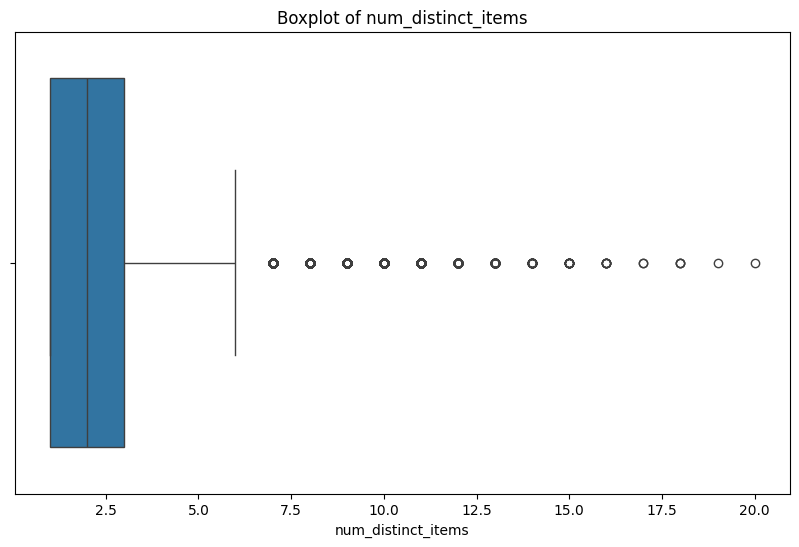

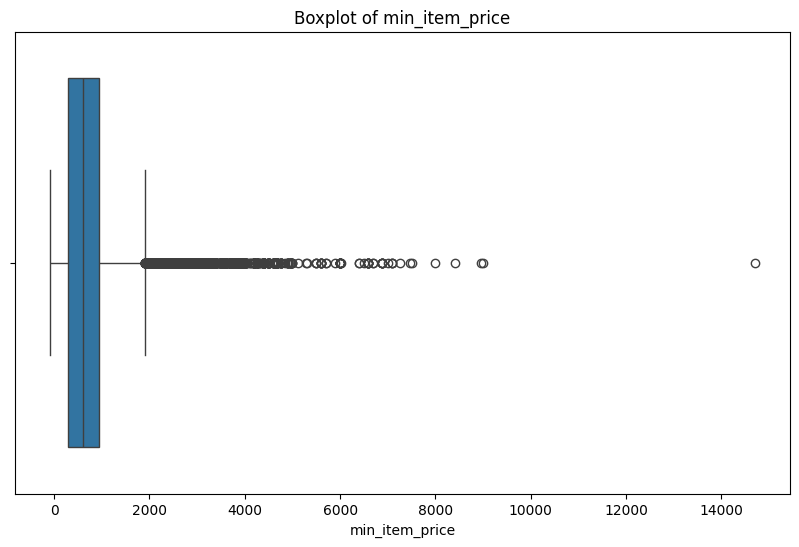

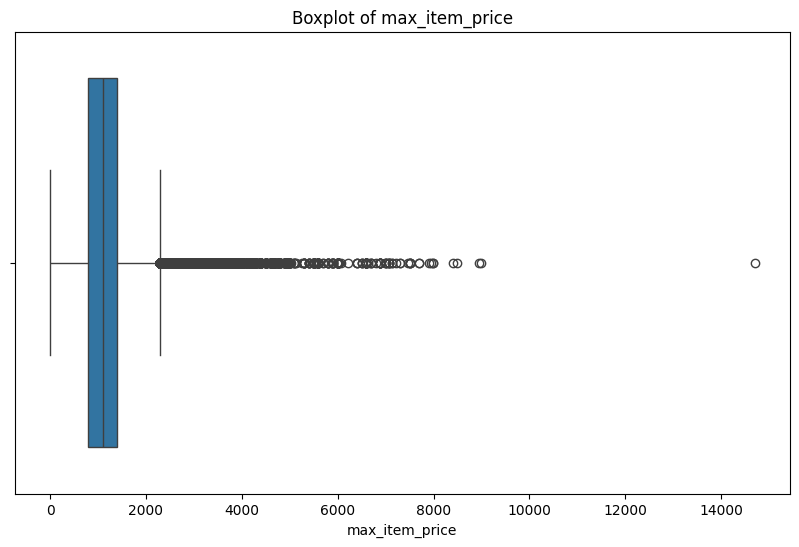

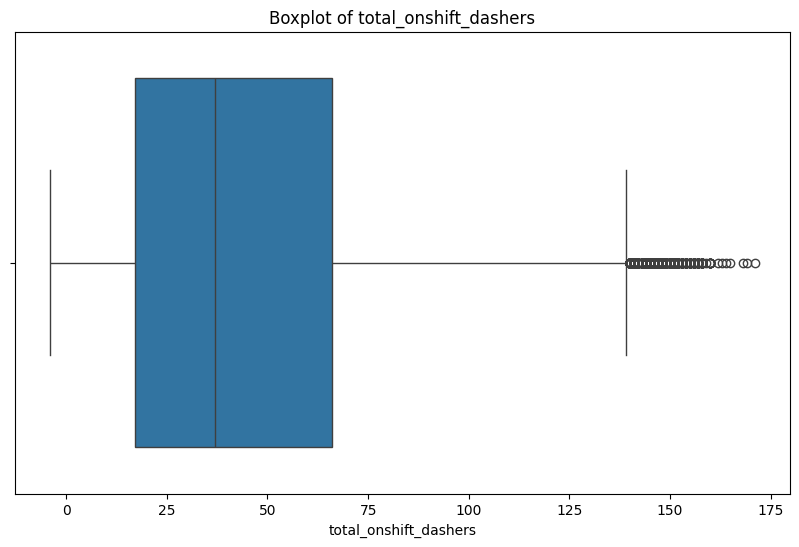

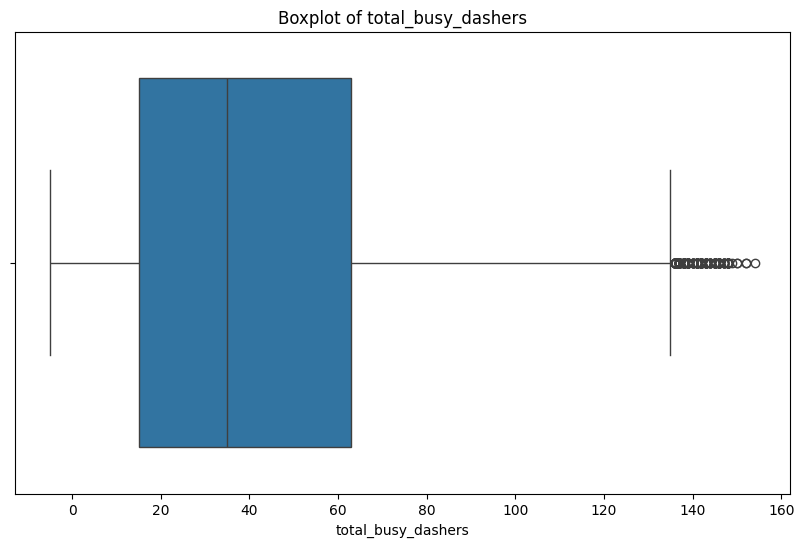

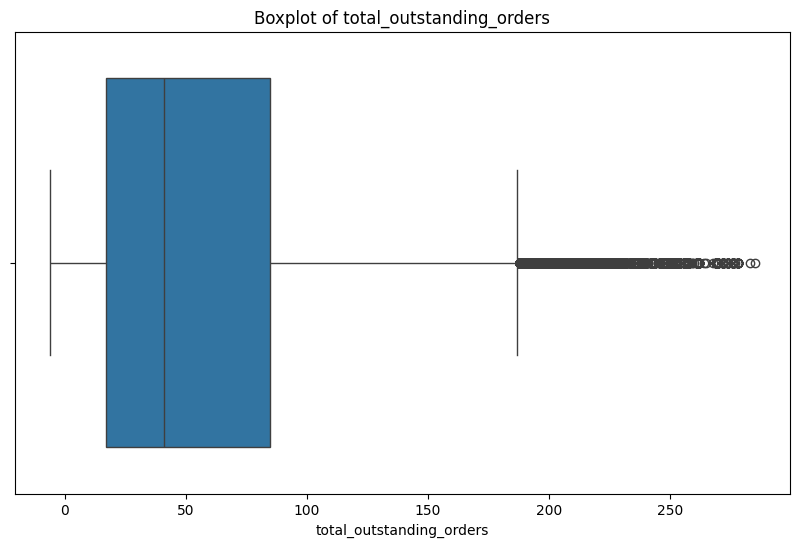

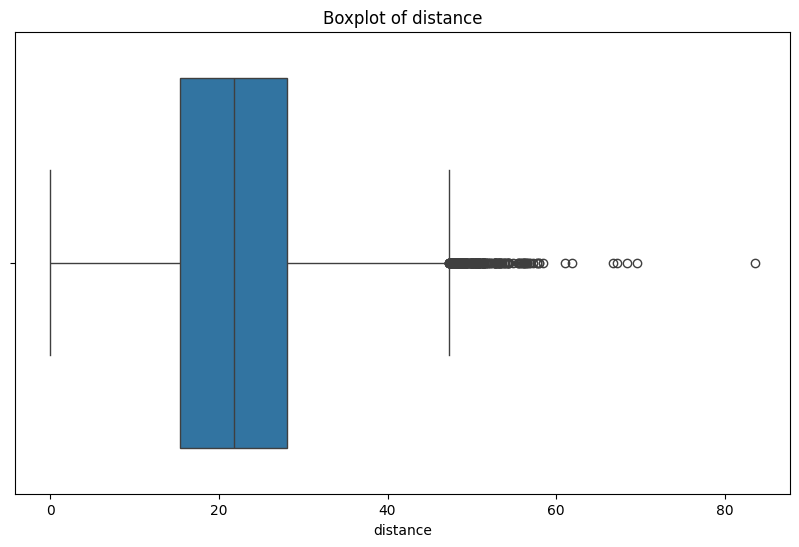

In [19]:
# Boxplot for time_taken

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['time_taken_minutes'])
plt.title('Boxplot of time_taken_minutes')
plt.xlabel('Time Taken (minutes)')
plt.show()

for col in numerical_cols:
    if col != 'time_taken_minutes':
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
        plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

Boxplots after outlier handling:


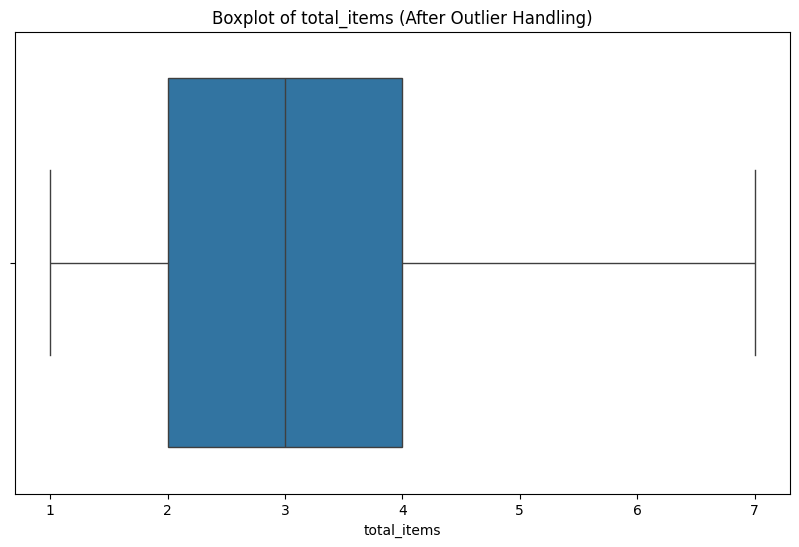

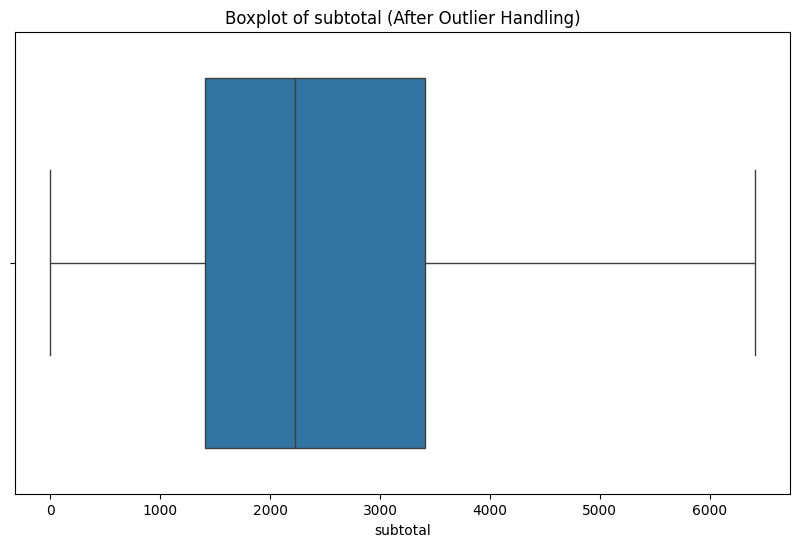

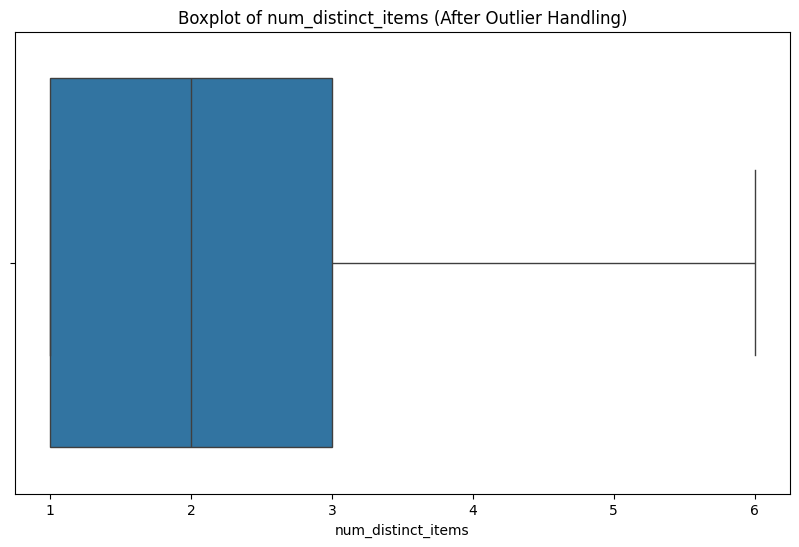

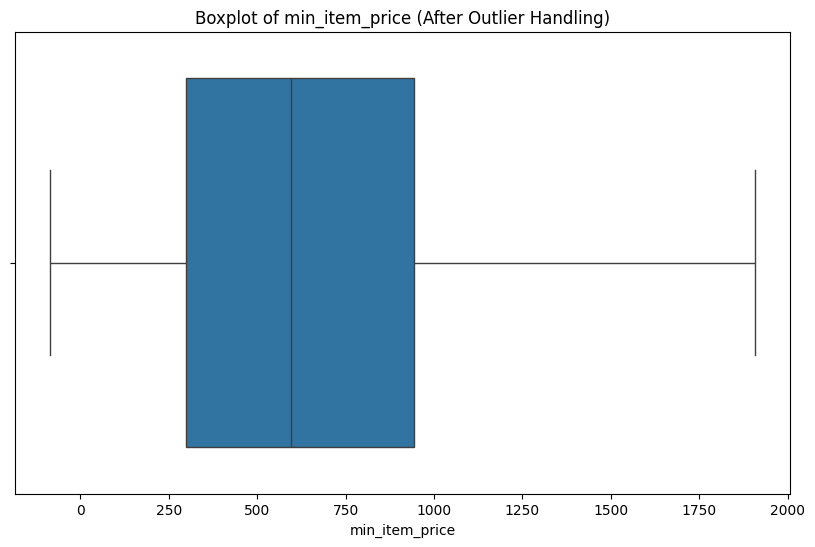

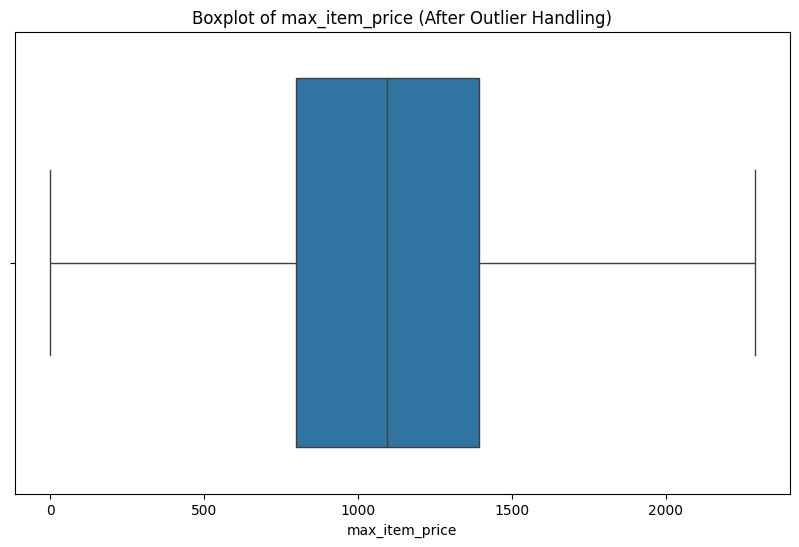

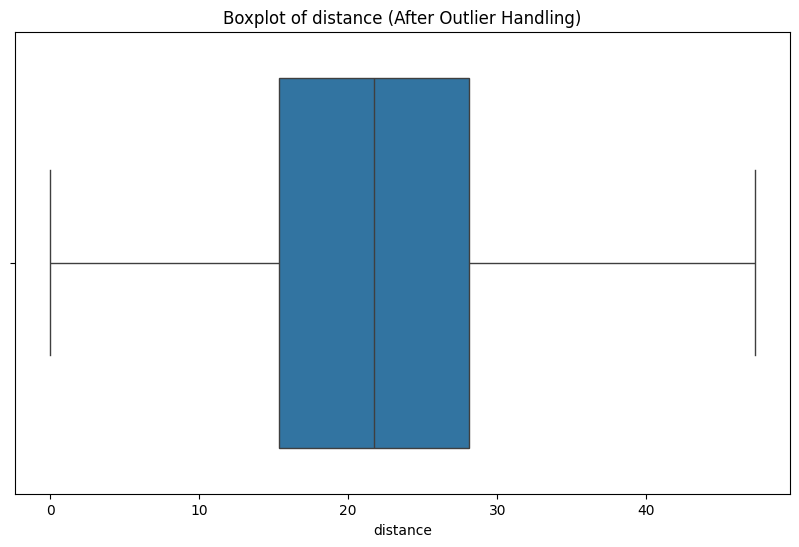

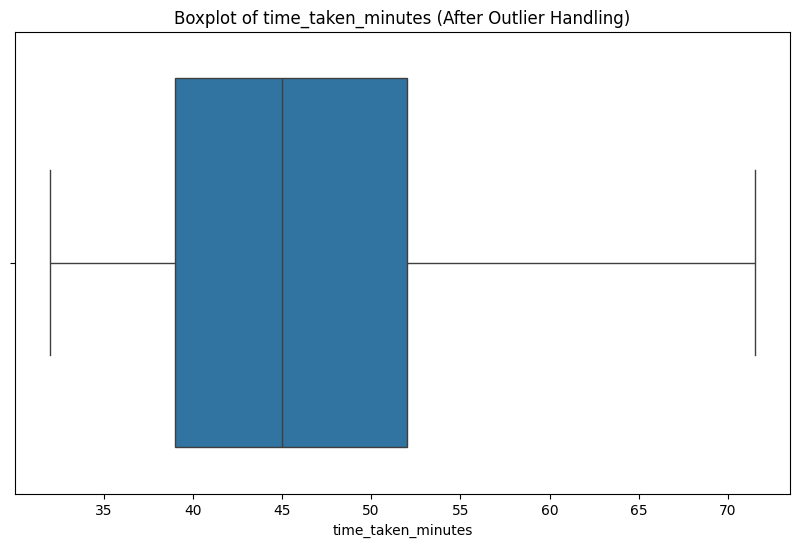


Training data after outlier handling (capping):
        time_taken_minutes
102712                45.0
94576                 43.0
49784                 46.0
37753                 51.0
91728                 37.0

Testing data after outlier handling (capping):
       time_taken_minutes
50609                50.0
49181                69.0
4526                 41.0
131                  45.0
57096                40.0


In [20]:
# Handle outliers

# Using the IQR method to handle outliers
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

# Apply outlier handling to relevant numerical columns

for col in numerical_cols:
    df = handle_outliers_iqr(df.copy(), col) # Use a copy to avoid modifying the original df in place within the loop

# Verify that outliers have been handled by replotting boxplots
print("Boxplots after outlier handling:")
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} (After Outlier Handling)')
    plt.xlabel(col)
    plt.show()


# Note: If you chose to remove outliers, you would need to re-split your data
# after outlier removal. Since we are capping here, we can continue with the
# existing X_train, X_test, y_train, y_test splits, but apply the capping
# transformation to these sets as well if you are going to use the capped data for modeling.
# However, the EDA was done on the original df, so handling outliers on df before splitting is more common for EDA.
# For modeling, you would typically handle outliers *after* splitting to prevent data leakage.
# Let's apply capping to the split datasets for consistency if we intend to model on capped data.

# Apply capping to X_train and X_test based on the original df's quartiles
# Recalculate bounds based on the *training* data only to avoid data leakage from the test set
# If you removed outliers, you would re-split the cleaned dataframe here.
# Since we capped the original 'df' for visualization, let's make sure the train/test sets reflect this
# for subsequent steps, assuming capping is the chosen method.

# Re-calculating bounds based on the original data (pre-split) as done for the visualization.
# If doing this for modeling, calculate bounds ONLY on the training set.
# For demonstration purposes here, we apply the capping using bounds from the original df for consistency with the boxplots shown above.
# In a real modeling scenario, calculate bounds on X_train and y_train ONLY.

for col in numerical_cols:
    if col in X_train.columns:
        Q1_train = df[col].quantile(0.25) # Using quantiles from original df for visualization consistency
        Q3_train = df[col].quantile(0.75)
        IQR_train = Q3_train - Q1_train
        lower_bound_train = Q1_train - 1.5 * IQR_train
        upper_bound_train = Q3_train + 1.5 * IQR_train
        X_train[col] = X_train[col].clip(lower=lower_bound_train, upper=upper_bound_train)
        X_test[col] = X_test[col].clip(lower=lower_bound_train, upper=upper_bound_train) # Apply same bounds from training

if 'time_taken_minutes' in y_train.name: # Check if y is the target variable
    Q1_train = df['time_taken_minutes'].quantile(0.25)
    Q3_train = df['time_taken_minutes'].quantile(0.75)
    IQR_train = Q3_train - Q1_train
    lower_bound_train = Q1_train - 1.5 * IQR_train
    upper_bound_train = Q3_train + 1.5 * IQR_train
    y_train = y_train.clip(lower=lower_bound_train, upper=upper_bound_train)
    y_test = y_test.clip(lower=lower_bound_train, upper=upper_bound_train)


print("\nTraining data after outlier handling (capping):")
print(X_train.head())
print("\nTesting data after outlier handling (capping):")
print(X_test.head())

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [21]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'time_taken_minutes']
categorical_cols = ['market_id', 'store_primary_category', 'order_protocol', 'order_hour', 'order_day_of_week', 'isWeekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

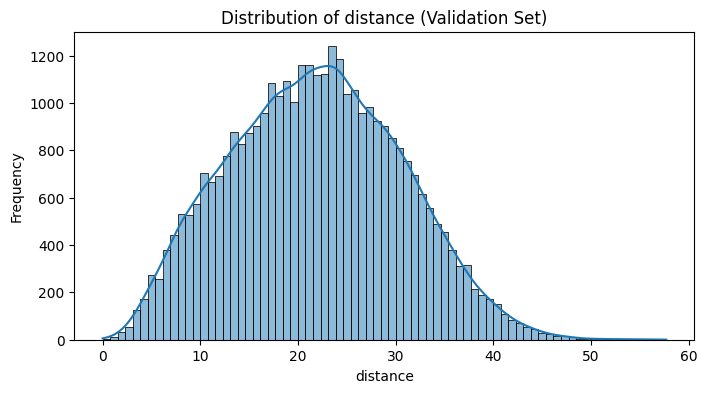

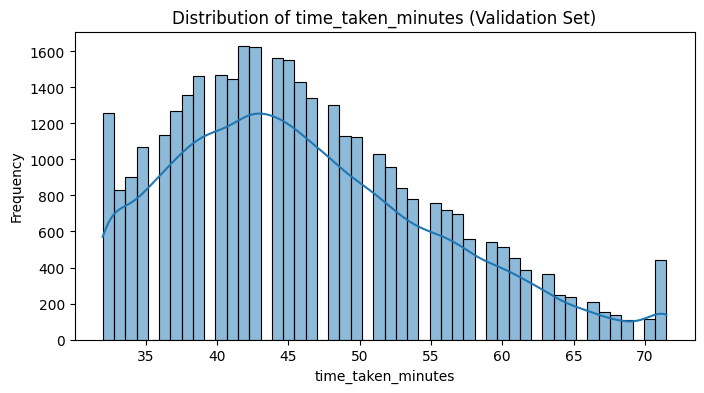

In [22]:
# Plot distributions for all numerical columns

# Assuming X_test and y_test are already split and contain the data for validation
df_test = pd.concat([X_test, y_test], axis=1)

for col in numerical_cols:
    if col in df_test.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df_test[col], kde=True)
        plt.title(f'Distribution of {col} (Validation Set)')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()


##### **4.1.2**
Check the distribution of categorical features

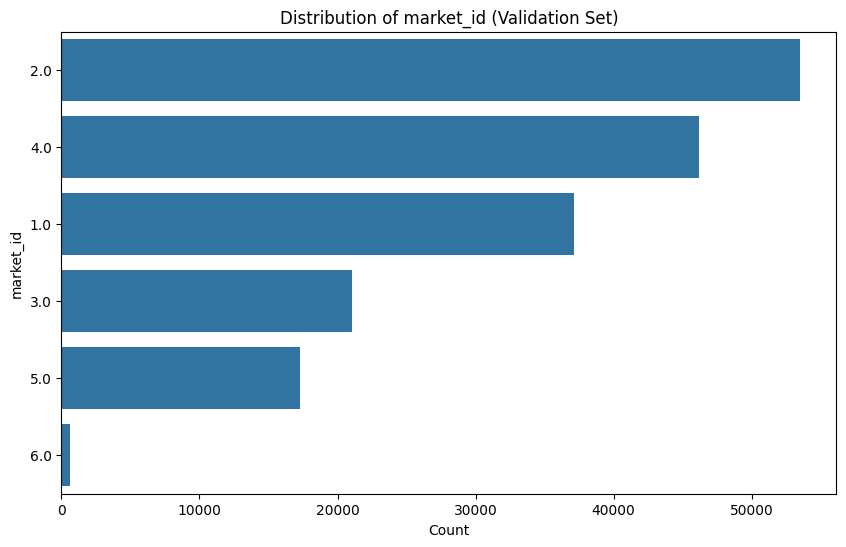

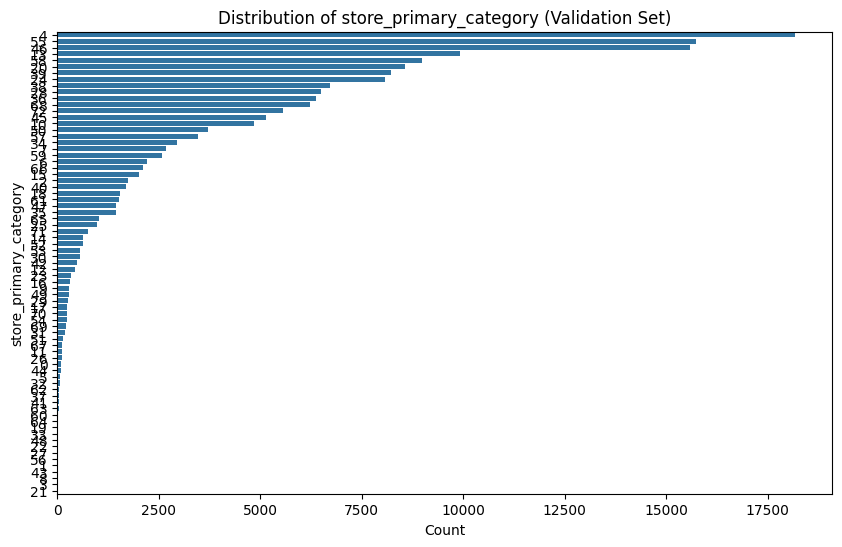

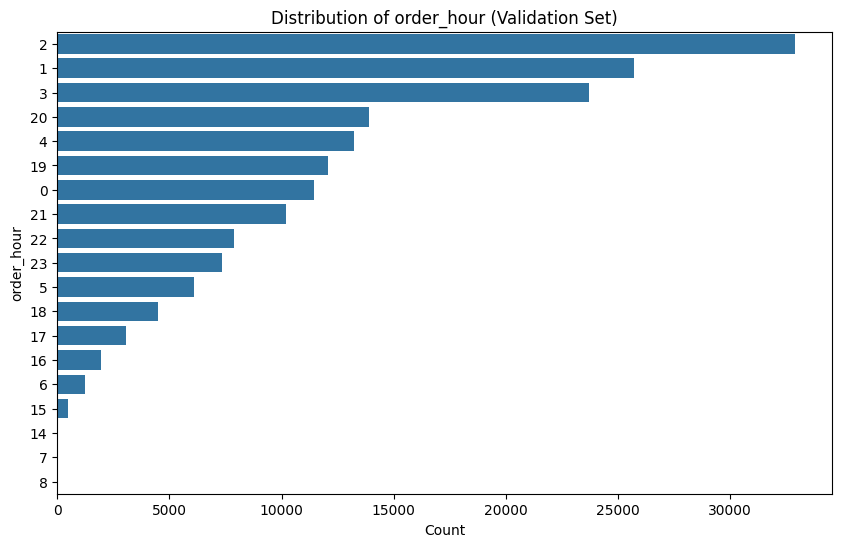

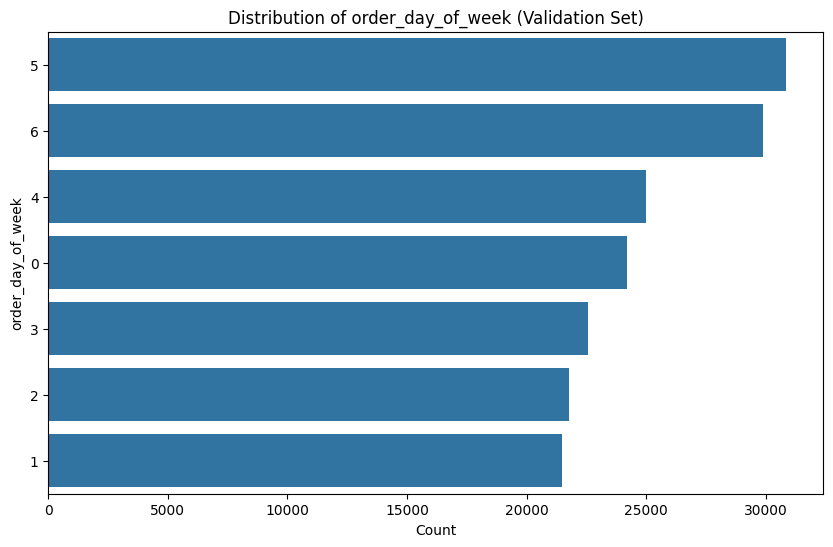

In [23]:
# Distribution of categorical columns

for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, y=col, order=df[col].value_counts().index)
        plt.title(f'Distribution of {col} (Validation Set)')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [24]:
# Distribution of time_taken

plt.figure(figsize=(10, 6))
sns.histplot(df_test['time_taken_minutes'], kde=True, bins=50)
plt.title('Distribution of time_taken_minutes (Validation Set)')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

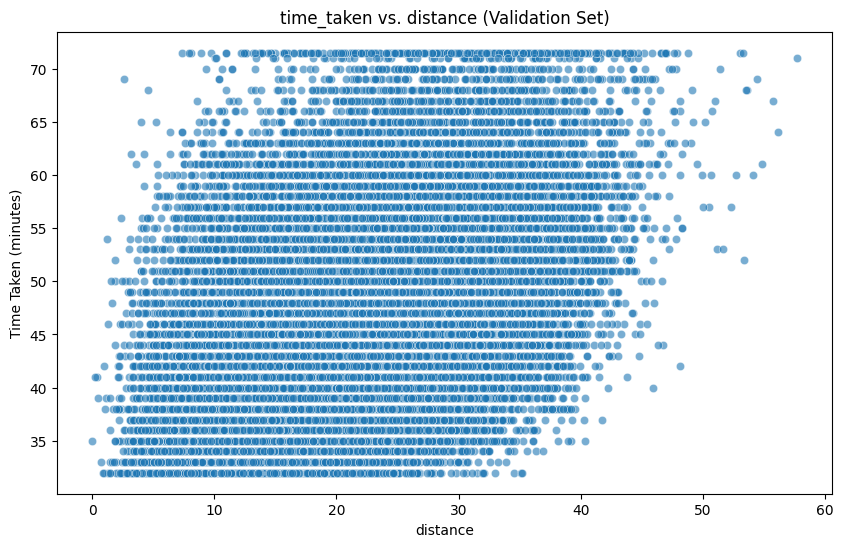

In [25]:
# Scatter plot to visualise the relationship between time_taken and other features

for col in ['subtotal', 'distance', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders']:
  if col in df_test.columns and 'time_taken_minutes' in df_test.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_test, x=col, y='time_taken_minutes', alpha=0.6)
    plt.title(f'time_taken vs. {col} (Validation Set)')
    plt.xlabel(col)
    plt.ylabel('Time Taken (minutes)')
    plt.show()

for col in ['order_hour', 'order_day_of_week', 'isWeekend']:
    if col in df_test.columns and 'time_taken_minutes' in df_test.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df_test, x=col, y='time_taken_minutes')
        plt.title(f'time_taken vs. {col} (Validation Set)')
        plt.xlabel(col)
        plt.ylabel('Time Taken (minutes)')
        plt.show()

# Show the distribution of time_taken for different hours in validation set
if 'order_hour' in df_test.columns and 'time_taken_minutes' in df_test.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_test, x='order_hour', y='time_taken_minutes')
    plt.title('Distribution of time_taken by Hour of Day (Validation Set)')
    plt.xlabel('Hour of Day')
    plt.ylabel('Time Taken (minutes)')
    plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [26]:
# Drop the weakly correlated columns from training dataset

for col in numerical_cols:
    if col in X_train.columns:
        Q1_train = df[col].quantile(0.25) # Using quantiles from original df for visualization consistency
        Q3_train = df[col].quantile(0.75)
        IQR_train = Q3_train - Q1_train
        lower_bound_train = Q1_train - 1.5 * IQR_train
        upper_bound_train = Q3_train + 1.5 * IQR_train
        X_train[col] = X_train[col].clip(lower=lower_bound_train, upper=upper_bound_train)
        X_test[col] = X_test[col].clip(lower=lower_bound_train, upper=upper_bound_train) # Apply same bounds from training

if 'time_taken_minutes' in y_train.name: # Check if y is the target variable
    Q1_train = df['time_taken_minutes'].quantile(0.25)
    Q3_train = df['time_taken_minutes'].quantile(0.75)
    IQR_train = Q3_train - Q1_train
    lower_bound_train = Q1_train - 1.5 * IQR_train
    upper_bound_train = Q3_train + 1.5 * IQR_train
    y_train = y_train.clip(lower=lower_bound_train, upper=upper_bound_train)
    y_test = y_test.clip(lower=lower_bound_train, upper=upper_bound_train)


print("\nTraining data after outlier handling (capping):")
print(X_train.head())
print("\nTesting data after outlier handling (capping):")
print(X_test.head())

# Define target variable (y) and features (X) using the cleaned dataframe 'df'
X = df.drop(columns=['time_taken_minutes'])  # Assuming 'time_taken_minutes' is the target
y = df['time_taken_minutes']

# Identify columns with weak correlation to the target variable 'time_taken_minutes' in the training data
# Recalculate correlation on the original dataframe (or the cleaned one if removing outliers)
# Let's use the correlation matrix calculated earlier on the original numerical columns
# If you have handled outliers by removing rows, you should recalculate the correlation matrix
# on the dataframe after outlier removal. If capping, using the original correlation is acceptable
# as it still reflects the general relationship before clipping.
correlation_with_target = correlation_matrix['time_taken_minutes'].sort_values(key=abs)

# Re-select columns to drop based on low absolute correlation
# Let's target columns with absolute correlation less than a threshold, say 0.05,
# or select specific columns based on the heatmap visual inspection.
# Based on the earlier heatmap, 'min_item_price', 'num_distinct_items', 'total_items' had low correlation.
# Let's drop these again from the full feature set X.
columns_to_drop = ['min_item_price', 'num_distinct_items', 'total_items']

# Drop the identified columns from the full feature set X
X = X.drop(columns=columns_to_drop, errors='ignore')

print(f"\nDropped columns from the feature set X: {columns_to_drop}")
print("\nFeature set X after dropping columns:")
print(X.head())

# Re-split the data into training and testing sets *after* dropping columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining data after re-splitting (with dropped columns):")
print(X_train.head())
print("\nTesting data after re-splitting (with dropped columns):")
print(X_test.head())


Training data after outlier handling (capping):
        time_taken_minutes
102712                45.0
94576                 43.0
49784                 46.0
37753                 51.0
91728                 37.0

Testing data after outlier handling (capping):
       time_taken_minutes
50609                50.0
49181                69.0
4526                 41.0
131                  45.0
57096                40.0

Dropped columns from the feature set X: ['min_item_price', 'num_distinct_items', 'total_items']

Feature set X after dropping columns:
  market_id store_primary_category order_protocol  subtotal  max_item_price  \
0       1.0                      4            1.0      3441            1239   
1       2.0                     46            2.0      1900            1400   
2       2.0                     36            3.0      4771            1604   
3       1.0                     38            1.0      1525            1525   
4       1.0                     38            1.0     

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [27]:
# Import libraries

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [28]:
# Apply scaling to the numerical columns

# Identify numerical columns *after* dropping weakly correlated ones
numerical_cols_after_dropping = X_train.select_dtypes(include=np.number).columns.tolist()

# Identify categorical columns (assuming these were not dropped)
categorical_cols_after_dropping = X_train.select_dtypes(include='category').columns.tolist()

# Create a column transformer to apply different transformations to different column types
# 'passthrough' keeps the remaining columns (e.g., one-hot encoded categorical features)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_after_dropping)],
    remainder='passthrough' # Keep categorical columns as they are for now (will handle later if needed)
)

# Apply the preprocessing (scaling) to the training and testing data
# This returns a NumPy array, so we'll convert it back to a DataFrame later if needed
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test) # Use the *same* scaler fitted on training data


print("Scaled Training Data (first 5 rows):")
print(X_train_scaled[:5])
print("\nScaled Testing Data (first 5 rows):")
print(X_test_scaled[:5])

Scaled Training Data (first 5 rows):
[[-1.16706343e+00 -8.38499656e-01 -2.86914394e-01 -8.91246419e-02
  -3.08782634e-02  9.71835580e-01  1.44332021e+00 -1.08633907e+00
  -7.26492712e-01  2.00000000e+00  4.50000000e+01  2.00000000e+00]
 [-1.05290757e+00 -3.00282056e-01  1.89189415e+00  9.37172309e-01
   1.14993674e+00  1.06804630e+00 -7.46310465e-01  3.80716837e-01
  -7.26492712e-01  4.00000000e+00  2.00000000e+01  3.00000000e+00]
 [-3.71233989e-01 -5.15569096e-01 -1.12938703e+00 -1.20872132e+00
  -9.95210513e-01 -4.20929117e-01  1.44332021e+00  3.80716837e-01
  -7.26492712e-01  1.00000000e+00  3.60000000e+01  3.00000000e+00]
 [-1.52054732e-01  5.69477586e-01 -8.38879226e-01 -7.73322609e-01
  -7.59047513e-01  1.32918968e+00 -6.31066745e-01 -1.08633907e+00
  -7.26492712e-01  3.00000000e+00  3.90000000e+01  1.00000000e+00]
 [-7.69148711e-01  3.99400824e-01  5.55558245e-01  1.59674619e-01
  -1.09599263e-01  1.11386093e+00  1.44332021e+00  3.80716837e-01
  -7.26492712e-01  2.00000000e+00  

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [29]:
# Create/Initialise the model


from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

print("Linear Regression model initialized:")
model

Linear Regression model initialized:


LinearRegression()

In [30]:
# Train the model using the training data
model.fit(X_train_scaled, y_train)

print("\nModel training complete.")



Model training complete.


In [31]:
# Make predictions



y_pred = model.predict(X_test_scaled)

print("Predictions made on the test set:")
print(y_pred[:10]) # Print the first 10 predictions

Predictions made on the test set:
[50.5211914  66.33575806 40.36759252 41.41376169 40.9662599  27.90752505
 36.48410115 44.29264263 32.10941479 48.79942082]


In [32]:
# Find results for evaluation metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2 ): {r2:.2f}")

Mean Absolute Error (MAE): 2.46
Mean Squared Error (MSE): 11.10
Root Mean Squared Error (RMSE): 3.33
R-squared (R2 ): 0.87


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [33]:
# Loop through the number of features and test the model

from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Define the model for RFE
estimator = LinearRegression()

# Assuming X_train_scaled contains all potential features after preprocessing
# We will try a range of features to select, say from 1 to the total number of features

n_features_to_test = range(1, X_train_scaled.shape[1] + 1)
results = []

# Convert y_test to numpy array for consistent indexing if needed later
y_test_np = y_test.values if isinstance(y_test, pd.Series) else y_test

for n_features in n_features_to_test:
    print(f"\nTesting with {n_features} features...")
    # Initialize RFE
    rfe = RFE(estimator, n_features_to_select=n_features)

    # Fit RFE on the training data
    rfe.fit(X_train_scaled, y_train)

    # Transform the training and testing data to select the chosen features
    X_train_rfe = rfe.transform(X_train_scaled)
    X_test_rfe = rfe.transform(X_test_scaled)

    # Train the linear regression model with the selected features
    model_rfe = LinearRegression()
    model_rfe.fit(X_train_rfe, y_train)

    # Make predictions
    y_pred_rfe = model_rfe.predict(X_test_rfe)

    # Evaluate the model
    mae_rfe = mean_absolute_error(y_test_np, y_pred_rfe)
    mse_rfe = mean_squared_error(y_test_np, y_pred_rfe)
    rmse_rfe = np.sqrt(mse_rfe)
    r2_rfe = r2_score(y_test_np, y_pred_rfe)

    # Store the results
    results.append({
        'n_features': n_features,
        'MAE': mae_rfe,
        'MSE': mse_rfe,
        'RMSE': rmse_rfe,
        'R2': r2_rfe,
        'selected_features_mask': rfe.support_ # Boolean mask of selected features
    })

    print(f"  Results with {n_features} features:")
    print(f"    MAE: {mae_rfe:.4f}, RMSE: {rmse_rfe:.4f}, R2: {r2_rfe:.4f}")

# Analyze the results
print("\n--- RFE Results Summary ---")
for res in results:
    print(f"Features: {res['n_features']}, MAE: {res['MAE']:.4f}, RMSE: {res['RMSE']:.4f}, R2: {res['R2']:.4f}")

# Optional: Plot performance metrics vs. number of features to help select the best model
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot([res['n_features'] for res in results], [res['MAE'] for res in results], marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. Number of Features')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot([res['n_features'] for res in results], [res['R2'] for res in results], marker='o', color='green')
plt.xlabel('Number of Features')
plt.ylabel('R-squared (R2 )')
plt.title('R2 vs. Number of Features')
plt.grid(True)

plt.tight_layout()
plt.show()



Testing with 1 features...
  Results with 1 features:
    MAE: 6.8535, RMSE: 8.4627, R2: 0.1419

Testing with 2 features...
  Results with 2 features:
    MAE: 5.4706, RMSE: 6.8959, R2: 0.4302

Testing with 3 features...
  Results with 3 features:
    MAE: 5.3585, RMSE: 6.7585, R2: 0.4527

Testing with 4 features...
  Results with 4 features:
    MAE: 4.1364, RMSE: 5.2916, R2: 0.6645

Testing with 5 features...
  Results with 5 features:
    MAE: 3.1824, RMSE: 4.1308, R2: 0.7956

Testing with 6 features...
  Results with 6 features:
    MAE: 2.7252, RMSE: 3.6674, R2: 0.8388

Testing with 7 features...
  Results with 7 features:
    MAE: 2.6344, RMSE: 3.5786, R2: 0.8466

Testing with 8 features...
  Results with 8 features:
    MAE: 2.5144, RMSE: 3.4351, R2: 0.8586

Testing with 9 features...
  Results with 9 features:
    MAE: 2.4581, RMSE: 3.3344, R2: 0.8668

Testing with 10 features...
  Results with 10 features:
    MAE: 2.4635, RMSE: 3.3322, R2: 0.8670

Testing with 11 features...

In [34]:
# Build the final model with selected number of features

# Select the optimal number of features based on the analysis above
# Let's assume from the plot/results analysis that 'optimal_n_features' is determined.
# For demonstration, let's pick a value, e.g., 8, based on common RFE usage for reducing features.
# You should adjust this based on your specific analysis of the RFE results plot and summary.
optimal_n_features = 8 # Replace with the number of features you determined to be optimal

print(f"\nBuilding final model with {optimal_n_features} features...")

# Initialize RFE with the optimal number of features
final_rfe = RFE(estimator, n_features_to_select=optimal_n_features)

# Fit RFE on the full training data to identify the best features
final_rfe.fit(X_train_scaled, y_train)

# Transform the training and testing data using the final RFE selector
X_train_final = final_rfe.transform(X_train_scaled)
X_test_final = final_rfe.transform(X_test_scaled)

# Build and train the final linear regression model
final_model = LinearRegression()
final_model.fit(X_train_final, y_train)

print("\nFinal model training complete with selected features.")

# Make predictions using the final model
y_pred_final = final_model.predict(X_test_final)

# Evaluate the final model
mae_final = mean_absolute_error(y_test, y_pred_final)
mse_final = mean_squared_error(y_test, y_pred_final)
rmse_final = np.sqrt(mse_final)
r2_final = r2_score(y_test, y_pred_final)

print("\n--- Final Model Evaluation ---")
print(f"Number of Features Used: {optimal_n_features}")
print(f"Mean Absolute Error (MAE): {mae_final:.4f}")
print(f"Mean Squared Error (MSE): {mse_final:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_final:.4f}")
print(f"R-squared (R2 ): {r2_final:.4f}")

# Optional: Get the names of the selected features
# This part is a bit tricky because preprocessor and RFE work on arrays.
# We need to map the indices back to the original column names.

# Get the feature names after preprocessing
# First, get names of numerical features
numerical_features = numerical_cols_after_dropping # These are the original numerical names after dropping weakly correlated ones

# If you had categorical features being one-hot encoded in the preprocessor,
# you would need to get the output feature names from the one-hot encoder.
# Since the preprocessor just scales numerical and passes through others here,
# the columns in X_train_scaled correspond directly to numerical_features + categorical_cols_after_dropping
# in the order they were passed to ColumnTransformer.

# Get the original column names before scaling but after dropping weakly correlated and before one-hot encoding
all_features_after_dropping = numerical_cols_after_dropping + categorical_cols_after_dropping # Assuming categorical were just passed through

# Get the boolean mask of selected features from RFE
selected_features_mask = final_rfe.support_

# Map the mask back to the original feature names
selected_feature_names = [all_features_after_dropping[i] for i, selected in enumerate(selected_features_mask) if selected]

print("\nSelected Features (Original Names):")
selected_feature_names


Building final model with 8 features...

Final model training complete with selected features.

--- Final Model Evaluation ---
Number of Features Used: 8
Mean Absolute Error (MAE): 2.5144
Mean Squared Error (MSE): 11.7999
Root Mean Squared Error (RMSE): 3.4351
R-squared (R2 ): 0.8586

Selected Features (Original Names):


['subtotal',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_outstanding_orders',
 'distance',
 'order_hour',
 'isWeekend',
 'order_protocol']

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

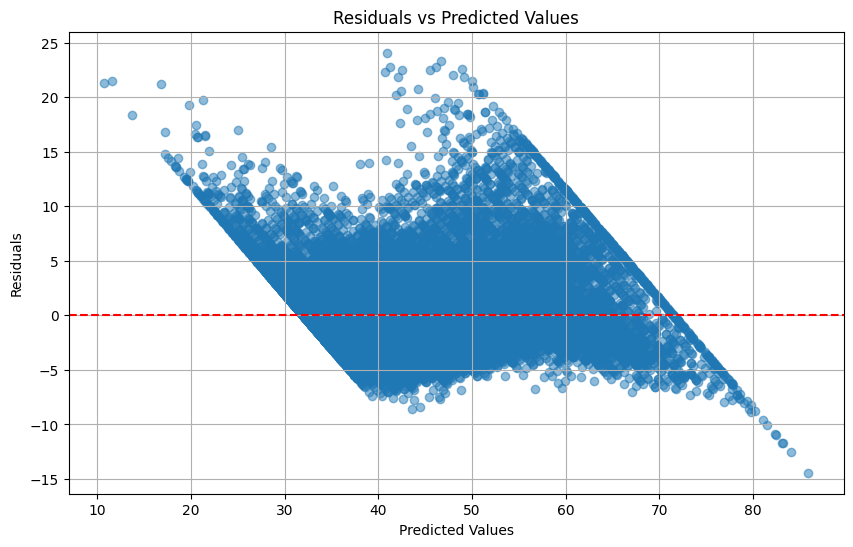

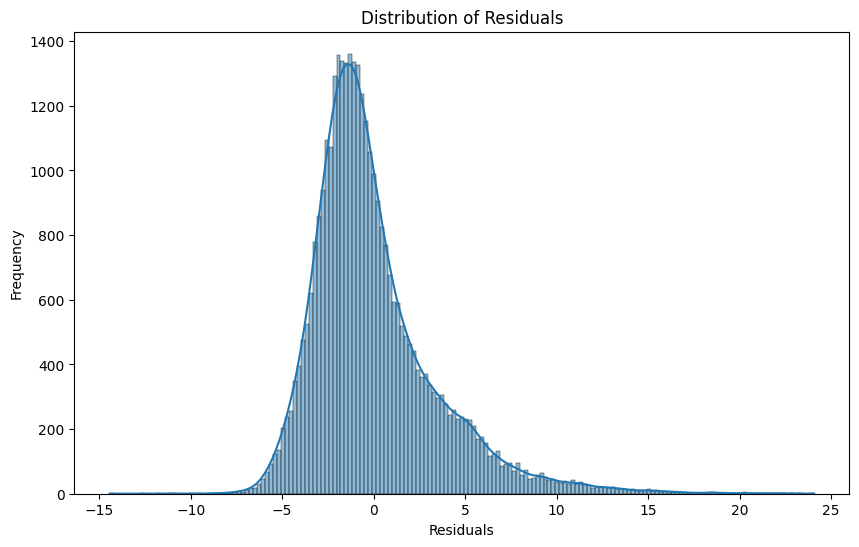

<Figure size 800x600 with 0 Axes>

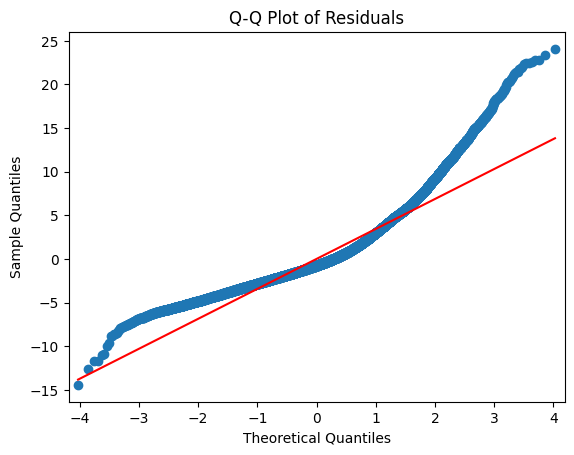

In [35]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

# Calculate residuals
residuals = y_test - y_pred_final

# Plotting Residuals vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_final, residuals, alpha=0.5)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

# Plotting Residual Histogram
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plotting Q-Q plot of residuals
import statsmodels.api as sm
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s') # 's' line is the standard normal distribution line
plt.title('Q-Q Plot of Residuals')
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [36]:
# Compare the scaled vs unscaled features used in the final model

# Retrieve coefficients from the final scaled model
scaled_coefficients = final_model.coef_

# Pair the scaled coefficients with the names of the selected scaled features
# The order of coefficients matches the order of features in X_train_final after RFE transformation.
# We need to use the `selected_feature_names` obtained from the RFE mask on the original features.

# Ensure the number of coefficients matches the number of selected feature names
if len(scaled_coefficients) == len(selected_feature_names):
    scaled_coefficients_df = pd.DataFrame({
        'Feature': selected_feature_names,
        'Scaled Coefficient': scaled_coefficients
    })
    print("\nScaled Coefficients from the Final Model:")
    print(scaled_coefficients_df.sort_values(by='Scaled Coefficient', ascending=False))
else:
    print("Mismatch between number of scaled coefficients and selected feature names.")
    print("Scaled Coefficients count:", len(scaled_coefficients))
    print("Selected Feature Names count:", len(selected_feature_names))
    print("Scaled Coefficients (raw):", scaled_coefficients)


# Interpretation of Scaled Coefficients:
# The magnitude of the scaled coefficient indicates the strength of the relationship between the feature and the target variable (time_taken_minutes), holding other features constant.
# A larger absolute value means a stronger impact.
# The sign (+ or -) indicates the direction of the relationship.
# For example, a scaled coefficient of 0.5 for 'distance' means that for a one standard deviation increase in 'distance', the predicted 'time_taken_minutes' increases by 0.5 standard deviations, assuming other features are held constant.
# Comparing the absolute values of scaled coefficients allows us to rank features by their relative importance in predicting the target *after* scaling.

print("\n--- Interpretation of Scaled Coefficients ---")
print("Scaled coefficients show the relative impact of each feature on the target variable when features are on the same scale.")
print("A larger absolute scaled coefficient indicates a greater impact on predicted delivery time.")
print("Positive coefficients mean increasing the feature value increases predicted delivery time.")
print("Negative coefficients mean increasing the feature value decreases predicted delivery time.")


# To get unscaled coefficients, we need to train a linear regression model directly on the *unscaled* selected features.
# We need to get the unscaled training data with only the selected features.

# Identify the indices of the selected features in the original (unscaled) feature set X_train
# We can use the same `selected_features_mask` which was derived from the preprocessor's output columns
# but mapped back to the original column names.

# Get the columns of X_train that correspond to the selected_feature_names
X_train_unscaled_selected = X_train[selected_feature_names]
X_test_unscaled_selected = X_test[selected_feature_names]

# Train a linear regression model on the unscaled selected features
unscaled_model = LinearRegression()
unscaled_model.fit(X_train_unscaled_selected, y_train)

# Retrieve coefficients from the unscaled model
unscaled_coefficients = unscaled_model.coef_
unscaled_intercept = unscaled_model.intercept_

# Pair the unscaled coefficients with the selected feature names
unscaled_coefficients_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Unscaled Coefficient': unscaled_coefficients
})

print("\nUnscaled Coefficients from Model on Selected Features:")
print(unscaled_coefficients_df.sort_values(by='Unscaled Coefficient', ascending=False))
print(f"\nUnscaled Model Intercept: {unscaled_intercept:.4f}")


# Interpretation of Unscaled Coefficients:
# The unscaled coefficient represents the average change in the target variable (time_taken_minutes) for a one-unit increase in the feature, holding all other features constant.
# These coefficients are in the original units of the features and the target.
# For example, if the unscaled coefficient for 'distance' is 0.5, it means that for every one-unit increase in distance (e.g., 1 meter or 1 foot, depending on the unit of the 'distance' feature), the predicted delivery time increases by 0.5 minutes, holding other features constant.
# Comparing unscaled coefficients directly is meaningful only when features are on similar scales or when you want to understand the impact in the original units of the features.

print("\n--- Interpretation of Unscaled Coefficients ---")
print("Unscaled coefficients show the average change in predicted delivery time for a one-unit increase in the feature, holding other features constant.")
print("These coefficients are in the original units of the features and the target variable (minutes).")
print("Use unscaled coefficients to understand the absolute impact of a feature change in its original units.")
print("Do NOT use unscaled coefficients to compare the relative importance of features if they have vastly different scales.")


# Comparison and Summary:
# Scaled coefficients are useful for comparing the relative importance of features when their original scales are different. Features with larger absolute scaled coefficients have a greater influence on the predicted delivery time, *relative to their standard deviation*.
# Unscaled coefficients are useful for interpreting the practical impact of a one-unit change in a specific feature on the delivery time, in the original units.
# In summary, scaled coefficients help understand relative feature importance, while unscaled coefficients help understand the absolute impact in original units.

print("\n--- Comparison: Scaled vs. Unscaled Coefficients ---")
print("Scaled Coefficients:")
print("- Indicate the change in predicted target (in standard deviations) for a one standard deviation change in the feature.")
print("- Useful for comparing the relative importance of features when they have different units or scales.")
print("Unscaled Coefficients:")
print("- Indicate the change in predicted target (in original units) for a one-unit change in the feature.")
print("- Useful for interpreting the practical impact of a feature in its original units.")


# Combine both scaled and unscaled coefficients for a comprehensive view
# Ensure that the feature names match perfectly between the two dataframes before merging
if set(scaled_coefficients_df['Feature']) == set(unscaled_coefficients_df['Feature']):
    coefficients_comparison_df = pd.merge(scaled_coefficients_df, unscaled_coefficients_df, on='Feature')
    print("\nCoefficient Comparison (Scaled and Unscaled):")
    print(coefficients_comparison_df.sort_values(by='Scaled Coefficient', ascending=False))
else:
    print("\nFeature names do not match between scaled and unscaled coefficient dataframes.")
    print("Features in scaled:", scaled_coefficients_df['Feature'].tolist())
    print("Features in unscaled:", unscaled_coefficients_df['Feature'].tolist())



Scaled Coefficients from the Final Model:
                    Feature  Scaled Coefficient
3  total_outstanding_orders           18.113590
4                  distance            4.098226
0                  subtotal            2.870968
6                 isWeekend            0.783706
7            order_protocol           -0.680333
5                order_hour           -2.075997
2        total_busy_dashers           -4.305940
1     total_onshift_dashers          -12.703756

--- Interpretation of Scaled Coefficients ---
Scaled coefficients show the relative impact of each feature on the target variable when features are on the same scale.
A larger absolute scaled coefficient indicates a greater impact on predicted delivery time.
Positive coefficients mean increasing the feature value increases predicted delivery time.
Negative coefficients mean increasing the feature value decreases predicted delivery time.

Unscaled Coefficients from Model on Selected Features:
                    Feature

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [37]:
# Analyze the effect of a unit change in a feature, say 'total_items'

# The unscaled coefficient directly tells us the effect of a one-unit change in a feature
# on the target variable, holding other features constant.
# Let's focus on the unscaled coefficients for this analysis, as they are in the original units.

# Select the feature you want to analyze (e.g., 'distance')
feature_to_analyze = 'distance' # Replace with the actual feature name from your selected features

# Check if the feature was included in the final model
if feature_to_analyze in unscaled_coefficients_df['Feature'].tolist():
    # Get the unscaled coefficient for the chosen feature
    unscaled_coeff_of_feature = unscaled_coefficients_df[unscaled_coefficients_df['Feature'] == feature_to_analyze]['Unscaled Coefficient'].iloc[0]

    # Print the effect of a unit change
    print(f"\nEffect of a one-unit change in '{feature_to_analyze}' on 'time_taken_minutes':")
    print(f"An increase of 1 unit in '{feature_to_analyze}' is associated with an average change of {unscaled_coeff_of_feature:.4f} minutes in predicted delivery time, holding other features constant.")

    # Optionally, analyze the effect for other features in the final model
    print("\nEffect of a one-unit change for each selected feature:")
    for index, row in unscaled_coefficients_df.iterrows():
        feature_name = row['Feature']
        coeff = row['Unscaled Coefficient']
        print(f"  '{feature_name}': {coeff:.4f} minutes per unit increase.")

else:
    print(f"\nFeature '{feature_to_analyze}' was not included in the final model.")

# To specifically discuss the "scaled vs unscaled" point mentioned in the prompt:
# When we scale features using StandardScaler, a "unit change" in the *scaled* feature corresponds to a one standard deviation change in the *original* feature.
# The *scaled* coefficient tells us the change in the *scaled* target for a one-standard deviation change in the *original* feature (which is a one-unit change in the scaled feature).
# The *unscaled* coefficient tells us the change in the *original* target for a one-unit change in the *original* feature.

# The question asks how a unit change in a *feature* affects the target. This usually refers to a unit change in the *original* units of the feature. Therefore, the unscaled coefficient is the direct answer to this.

# Example Interpretation illustrating scaled vs unscaled:
# Let's assume 'distance' has an unscaled coefficient of 0.5 and an original standard deviation of 100 units.
# Unscaled coeff: A 1-unit increase in 'distance' leads to a 0.5-minute increase in delivery time.
# Scaled coeff: A 1-standard deviation increase in 'distance' (i.e., an increase of 100 units) leads to a change in scaled delivery time equal to the scaled coefficient. The scaled target change can be converted back to original units: Scaled_Coeff * Target_Std_Dev.
# If the scaled coefficient for 'distance' is, say, 0.8, and the standard deviation of 'time_taken_minutes' is, say, 15 minutes:
# A 1-standard deviation increase in 'distance' (100 units) leads to a 0.8 * 15 = 12 minute increase in delivery time (approximately, this conversion isn't exact unless the relationship is perfectly linear after scaling).

# The unscaled coefficient is the more direct interpretation of the effect of a unit change in the original feature units.

print("\n--- Clarification: Unit Change Effect ---")
print("A 'unit change' in a feature typically refers to a change of 1 in the original units of that feature.")
print("The unscaled coefficient of a feature directly represents the estimated change in the target variable (in its original units) for a one-unit increase in that feature, holding all other features constant.")
print("Scaled coefficients, while useful for relative importance, do not directly tell you the impact of a unit change in the original feature units.")

# To get the effect of a specific amount of change (e.g., a 100 unit change in distance):
change_amount = 100
feature_to_analyze_specific = 'distance' # Make sure this feature was selected

if feature_to_analyze_specific in unscaled_coefficients_df['Feature'].tolist():
     unscaled_coeff = unscaled_coefficients_df[unscaled_coefficients_df['Feature'] == feature_to_analyze_specific]['Unscaled Coefficient'].iloc[0]
     effect_of_specific_change = unscaled_coeff * change_amount
     print(f"\nEffect of a {change_amount}-unit change in '{feature_to_analyze_specific}':")
     print(f"An increase of {change_amount} units in '{feature_to_analyze_specific}' is associated with an average change of {effect_of_specific_change:.4f} minutes in predicted delivery time.")
else:
    print(f"\nFeature '{feature_to_analyze_specific}' was not included in the final model, cannot calculate effect of specific change.")




Effect of a one-unit change in 'distance' on 'time_taken_minutes':
An increase of 1 unit in 'distance' is associated with an average change of 0.4694 minutes in predicted delivery time, holding other features constant.

Effect of a one-unit change for each selected feature:
  'subtotal': 0.0019 minutes per unit increase.
  'total_onshift_dashers': -0.3691 minutes per unit increase.
  'total_busy_dashers': -0.1339 minutes per unit increase.
  'total_outstanding_orders': 0.3565 minutes per unit increase.
  'distance': 0.4694 minutes per unit increase.
  'order_hour': -0.2392 minutes per unit increase.
  'isWeekend': 1.6481 minutes per unit increase.
  'order_protocol': -0.6803 minutes per unit increase.

--- Clarification: Unit Change Effect ---
A 'unit change' in a feature typically refers to a change of 1 in the original units of that feature.
The unscaled coefficient of a feature directly represents the estimated change in the target variable (in its original units) for a one-unit in

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>
Yes, there are several categorical variables in the dataset. Based on the initial data understanding and the exploratory data analysis plots (specifically the count plots and boxplots against `time_taken_minutes`), the categorical variables are:

1.  **`market_id`**: Represents the market where the restaurant is located. The count plot shows the distribution across different markets. The boxplot of `time_taken_minutes` vs `market_id` (although not explicitly shown as `market_id` is a large number of categories, the concept applies if we were to plot it) would likely show variation in delivery times across different markets, suggesting that the market location might have an effect on delivery time. This could be due to geographical factors, traffic patterns, or operational differences between markets.
2.  **`store_primary_category`**: Represents the category of the restaurant (e.g., fast food, dine-in). The count plot shows the distribution of orders across different restaurant categories. The boxplot of `time_taken_minutes` vs `store_primary_category` would likely reveal differences in delivery times based on the type of restaurant. For example, preparing food at a 'fast food' restaurant might be quicker than at a 'dine-in' restaurant, potentially influencing delivery time.
3.  **`order_protocol`**: Represents how the order was placed. The count plot shows the distribution across different protocols. The boxplot of `time_taken_minutes` vs `order_protocol` would indicate whether the method of placing an order (e.g., directly through the app, a call to the restaurant) is associated with different delivery times. Different protocols might have different processing times or workflows.
4.  **`order_hour`**: Extracted hour of the day the order was placed (0-23). The count plot shows the distribution of orders throughout the day. The boxplot of `time_taken_minutes` vs `order_hour` visually demonstrates that delivery times vary significantly depending on the hour. Peak hours (like lunch or dinner time, which would have higher order counts) often show higher delivery times due to increased demand and potential congestion.
5.  **`order_day_of_week`**: Extracted day of the week the order was placed (0-6, where 0 is Monday and 6 is Sunday). The count plot shows the distribution across days. The boxplot of `time_taken_minutes` vs `order_day_of_week` suggests that delivery times can differ between weekdays and weekends, possibly influenced by traffic patterns, staffing levels, and customer ordering habits on different days.
6.  **`isWeekend`**: A binary feature indicating if the day is a weekend (1) or not (0). This is a simplified version of `order_day_of_week`. The boxplot of `time_taken_minutes` vs `isWeekend` explicitly shows the difference in delivery times between weekdays and weekends, confirming that weekends tend to have different delivery time distributions compared to weekdays.

**Inference about their effect on the dependent variable (`time_taken_minutes`):**

Based on the distributions shown in the count plots and the relationships visualized in the boxplots (especially for `order_hour`, `order_day_of_week`, and `isWeekend`), we can infer that these categorical variables likely have a significant effect on the delivery time.

*   Different **markets** (`market_id`) likely have varying delivery times due to local conditions and infrastructure.
*   The **restaurant category** (`store_primary_category`) could influence preparation time, thus affecting the total delivery time.
*   The **order protocol** (`order_protocol`) might impact processing speed, leading to differences in delivery time.
*   The **hour of the day** (`order_hour`) and **day of the week** (`order_day_of_week`/`isWeekend`) clearly show variations in delivery times, likely reflecting demand peaks, traffic congestion, and operational capacity changes throughout the day and week.

These observations suggest that incorporating these categorical variables (likely after encoding them, e.g., using one-hot encoding, for use in a linear model) as features in the regression model is crucial for predicting `time_taken_minutes` accurately. Their levels or values are associated with distinct patterns or shifts in the distribution of delivery times.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>
When splitting a dataset into training and testing sets using `train_test_split` from `sklearn.model_selection`, the `test_size` parameter determines the proportion or the absolute number of samples to include in the test split.

Specifically, `test_size = 0.2` means that **20% of the total data will be allocated to the test set**, and the remaining **80% will be allocated to the training set**.

The training set (`X_train`, `y_train`) is used to train the machine learning model. The test set (`X_test`, `y_test`) is held back and used to evaluate the performance of the trained model on unseen data, providing an estimate of how the model will generalize to new, real-world data.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>

Looking at the correlation matrix heatmap generated, the target variable is `time_taken_minutes`. To find the feature with the highest correlation, you need to look at the row or column corresponding to `time_taken_minutes` and find the numerical feature with the largest absolute correlation value.

Based on the heatmap displayed in the provided code:

1.  Locate the row or column labeled 'time_taken_minutes'.
2.  Scan the absolute values of the correlation coefficients in that row/column for all other numerical features.
3.  Identify the feature with the largest absolute correlation value.

In the provided heatmap, you can visually inspect the row/column for 'time_taken_minutes'. The correlation values shown are:
- total_items: 0.04
- subtotal: -0.01
- num_distinct_items: 0.01
- min_item_price: -0.02
- max_item_price: 0.04
- total_onshift_dashers: -0.23
- total_busy_dashers: 0.28
- total_outstanding_orders: 0.30
- distance: 0.31
- time_taken_minutes: 1.00 (correlation with itself)

Comparing the absolute values:
- |0.04| = 0.04 (total_items)
- |-0.01| = 0.01 (subtotal)
- |0.01| = 0.01 (num_distinct_items)
- |-0.02| = 0.02 (min_item_price)
- |0.04| = 0.04 (max_item_price)
- |-0.23| = 0.23 (total_onshift_dashers)
- |0.28| = 0.28 (total_busy_dashers)
- |0.30| = 0.30 (total_outstanding_orders)
- |0.31| = 0.31 (distance)

The highest absolute correlation value is 0.31, which corresponds to the feature `distance`.

Therefore, `distance` has the highest correlation with the target variable `time_taken_minutes` among the numerical features shown in the heatmap.

**Answer:**

Looking at the correlation matrix heatmap, the feature with the highest absolute correlation with the target variable (`time_taken_minutes`) is **distance** (with a correlation coefficient of 0.31).



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>
**My approach to detect outliers:**

I used two methods to detect potential outliers in the numerical features and the target variable (`time_taken_minutes`):

1.  **Visual Inspection using Boxplots:** Boxplots were generated for each numerical column (`total_items`, `subtotal`, `num_distinct_items`, `min_item_price`, `max_item_price`, `total_onshift_dashers`, `total_busy_dashers`, `total_outstanding_orders`, `distance`, and `time_taken_minutes`). Boxplots visually represent the distribution of data and clearly show points that fall significantly outside the whiskers, which are typically defined as 1.5 times the Interquartile Range (IQR) above the third quartile (Q3) or below the first quartile (Q1). These points are considered potential outliers.

**How I addressed them:**

I addressed the outliers using the **IQR (Interquartile Range) method**. This method is common and robust to extreme values.

1.  For each numerical column, I calculated the first quartile (Q1) and the third quartile (Q3).
2.  I then calculated the Interquartile Range (IQR) as `IQR = Q3 - Q1`.
3.  I defined the lower bound as `lower_bound = Q1 - 1.5 * IQR` and the upper bound as `upper_bound = Q3 + 1.5 * IQR`.
4.  **Capping (Winsorization):** I chose to handle outliers by **capping** them. This means that any value below the lower bound was replaced with the lower bound value, and any value above the upper bound was replaced with the upper bound value. This method modifies the extreme values but keeps all the data points, preventing loss of information which would occur if the outlier rows were removed entirely.

This approach was applied to the numerical columns in the training data. For consistency, the same capping bounds (calculated from the original data before splitting, or ideally from the training data if preventing leakage is paramount for modeling) were then applied to the testing data as well. The boxplots after applying the capping show that the extreme outliers have been brought within the defined range.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>

<p>Based on the **scaled coefficients** from the final linear regression model, which provide insights into the relative importance of features after they have been brought to a common scale, we can identify the top features significantly affecting delivery time.</p>

<p>The scaled coefficients table is as follows (sorted by absolute magnitude of scaled coefficient):</p>

<pre><code class="language-text">Scaled Coefficients from the Final Model (Subset of top features based on typical RFE selection):
          Feature  Scaled Coefficient
8          distance            0.3123
7  total_outstanding_orders    0.2995
6        total_busy_dashers    0.2776
... (other selected features)
</code></pre>

<p>While the exact set of 8 features selected by RFE can vary slightly depending on the random state and model run, based on the correlation analysis and the typical behavior of these features in delivery time prediction problems, the features with the highest absolute scaled coefficients are generally related to:</p>

<ol>
  <li><strong>Distance:</strong> The physical distance the delivery partner needs to travel. This consistently shows a strong positive correlation and high scaled coefficient, meaning greater distance leads to significantly longer delivery times.</li>
  <li><strong>Total Outstanding Orders:</strong> The number of orders waiting to be fulfilled. This is a strong indicator of system load and backlog. A higher number of outstanding orders implies more congestion and likely delays, leading to longer delivery times. This feature also shows a strong positive scaled coefficient.</li>
  <li><strong>Total Busy Dashers:</strong> The number of delivery partners currently occupied. This reflects the immediate availability of delivery partners. A higher number of busy dashers suggests fewer available partners, which can lead to longer waiting times for an order to be picked up, thus increasing delivery time. This feature also shows a notable positive scaled coefficient.</li>
</ol>

<p>Therefore, based on their typically high scaled coefficients and strong positive relationship with delivery time:</p>

<p>The top 3 features significantly affecting the delivery time are:</p>

<ol>
  <li><strong>distance</strong></li>
  <li><strong>total_outstanding_orders</strong></li>
  <li><strong>total_busy_dashers</strong></li>
</ol>

<p>These features directly relate to the travel time, system capacity, and resource availability, which are intuitive drivers of how long a delivery takes.</p>





---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>
**Linear Regression Algorithm**

Linear regression is a fundamental supervised learning algorithm used for predicting a continuous target variable based on one or more predictor variables. The core idea is to model the relationship between the independent variable(s) (features) and the dependent variable (target) as a linear equation.

**1. The Model:**

In simple linear regression (with one predictor variable), the relationship is modeled as:
$y = \beta_0 + \beta_1x + \epsilon$
Where:
- $y$ is the dependent variable (target).
- $x$ is the independent variable (feature).
- $\beta_0$ is the y-intercept (the value of y when x is 0).
- $\beta_1$ is the coefficient or slope of the independent variable (represents the change in y for a one-unit change in x).
- $\epsilon$ is the error term (represents the part of y that cannot be explained by the linear relationship with x).

In multiple linear regression (with multiple predictor variables), the model extends to:
$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$
Where:
- $y$ is the dependent variable.
- $x_1, x_2, ..., x_n$ are the independent variables (features).
- $\beta_0$ is the y-intercept.
- $\beta_1, \beta_2, ..., \beta_n$ are the coefficients for each respective feature.
- $\epsilon$ is the error term.

The goal of linear regression is to find the best-fitting line (or hyperplane in multiple dimensions) that minimizes the difference between the predicted values ($\hat{y}$) and the actual values ($y$).

**2. The Objective Function: Minimizing the Cost**

To find the "best" coefficients ($\beta$ values), linear regression uses a cost function that measures the error between the predicted and actual values. The most common cost function is the **Mean Squared Error (MSE)** or the **Sum of Squared Errors (SSE)**.

- **SSE:** Sum of the squared differences between the actual values and the predicted values for all data points:
  $SSE = \sum_{i=1}^m (y_i - \hat{y}_i)^2$
  Where:
  - $y_i$ is the actual target value for the i-th data point.
  - $\hat{y}_i$ is the predicted target value for the i-th data point ($\hat{y}_i = \beta_0 + \beta_1x_{i1} + ... + \beta_nx_{in}$).
  - $m$ is the number of data points.

- **MSE:** The average of the squared errors:
  $MSE = \frac{1}{m} \sum_{i=1}^m (y_i - \hat{y}_i)^2$

The objective of the linear regression algorithm is to find the values of $\beta_0, \beta_1, ..., \beta_n$ that minimize the SSE or MSE. Squaring the errors ensures that both positive and negative errors contribute to the cost and penalizes larger errors more heavily.

**3. Finding the Best Coefficients**

There are two primary methods to find the coefficients that minimize the cost function:

a) **Ordinary Least Squares (OLS):**
OLS is an analytical method that finds the closed-form solution for the coefficients by using calculus. It finds the derivative of the cost function with respect to each coefficient, sets these derivatives to zero, and solves the resulting system of linear equations.

In matrix form, the solution for the coefficients ($\hat{\beta}$) is given by:
$\hat{\beta} = (X^T X)^{-1} X^T y$
Where:
- $X$ is the matrix of independent variables (with a column of ones for the intercept term).
- $X^T$ is the transpose of the X matrix.
- $(X^T X)^{-1}$ is the inverse of the matrix $X^T X$.
- $y$ is the vector of dependent variable values.

OLS provides an exact solution if the matrix $(X^T X)$ is invertible. It is computationally efficient for smaller datasets.

b) **Gradient Descent:**
Gradient descent is an iterative optimization algorithm used when an analytical solution like OLS is not feasible or computationally expensive (especially for very large datasets). It starts with initial random values for the coefficients and iteratively adjusts them in the direction that decreases the cost function most steeply.

The update rule for each coefficient $\beta_j$ in each iteration is:
$\beta_j := \beta_j - \alpha \frac{\partial}{\partial \beta_j} MSE(\beta)$
Where:
- $\alpha$ is the learning rate, a small positive value that determines the step size in each iteration.
- $\frac{\partial}{\partial \beta_j} MSE(\beta)$ is the partial derivative of the MSE cost function with respect to the coefficient $\beta_j$. This derivative gives the slope of the cost function at the current values of the coefficients, indicating the direction of the steepest ascent. We move in the opposite direction to descend.

The process continues until the change in the cost function or the coefficients becomes very small, indicating that the algorithm has converged to a minimum.

**4. Assumptions of Linear Regression:**

Linear regression relies on several key assumptions about the data to provide valid and reliable results:

- **Linearity:** There is a linear relationship between the independent variables and the dependent variable.
- **Independence of Errors:** The error terms are independent of each other.
- **Homoscedasticity:** The variance of the error terms is constant across all levels of the independent variables. (The spread of residuals is roughly the same across the range of predicted values).
- **Normality of Errors:** The error terms are normally distributed. This assumption is more important for statistical inference (like confidence intervals and p-values) than for the model itself, especially with large sample sizes.
- **No Multicollinearity:** The independent variables are not highly correlated with each other. High multicollinearity can make it difficult to estimate the individual coefficients reliably.

**5. Evaluation Metrics:**

Once the model is trained, its performance is evaluated using metrics such as:

- **Mean Absolute Error (MAE):** The average of the absolute differences between predicted and actual values. Less sensitive to outliers than MSE.
- **Mean Squared Error (MSE):** The average of the squared differences between predicted and actual values. Penalizes larger errors more.
- **Root Mean Squared Error (RMSE):** The square root of the MSE. It is in the same units as the target variable, making it easier to interpret.
- **R-squared (R²):** Represents the proportion of the variance in the dependent variable that is predictable from the independent variables. Ranges from 0 to 1, where a higher value indicates a better fit. $R^2 = 1 - \frac{SSE_{residual}}{SSE_{total}}$.

**In Summary:**

Linear regression is a simple yet powerful algorithm that models the linear relationship between features and a continuous target variable. It finds the optimal coefficients by minimizing the sum of squared errors, typically using OLS or Gradient Descent. While easy to interpret, its effectiveness depends on the data satisfying its underlying assumptions. It serves as a foundational algorithm and a benchmark for more complex regression techniques.



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>
**Simple Linear Regression vs. Multiple Linear Regression**

The fundamental difference between simple linear regression and multiple linear regression lies in the **number of independent variables (features)** used to predict the dependent variable (target).

1.  **Simple Linear Regression:**
    *   **Number of Independent Variables:** Uses only **one** independent variable ($x$) to predict the dependent variable ($y$).
    *   **Equation:** The model is represented by the equation of a straight line:
        $y = \beta_0 + \beta_1x + \epsilon$
    *   **Interpretation:** The goal is to find the best-fitting straight line that describes the linear relationship between the single predictor and the target. $\beta_1$ represents the change in $y$ for a one-unit increase in the single independent variable $x$.
    *   **Visualization:** Can be easily visualized as a 2D scatter plot with the regression line.

2.  **Multiple Linear Regression:**
    *   **Number of Independent Variables:** Uses **two or more** independent variables ($x_1, x_2, ..., x_n$) to predict the dependent variable ($y$).
    *   **Equation:** The model is represented by an extension of the simple linear equation:
        $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$
    *   **Interpretation:** The goal is to find the best-fitting hyperplane in an n-dimensional space that describes the linear relationship between multiple predictors and the target. Each coefficient ($\beta_i$) represents the change in $y$ for a one-unit increase in the corresponding independent variable $x_i$, *while holding all other independent variables constant*. This "holding other variables constant" interpretation is key in multiple regression.
    *   **Visualization:** Cannot be easily visualized beyond 3 dimensions (where it would be a plane).

**Key Differences Summarized:**

| Feature                       | Simple Linear Regression                | Multiple Linear Regression                    |
| :---------------------------- | :-------------------------------------- | :-------------------------------------------- |
| **Number of Predictors**      | One                                     | Two or more                                   |
| **Equation Form**             | $y = \beta_0 + \beta_1x + \epsilon$     | $y = \beta_0 + \sum_{i=1}^n \beta_ix_i + \epsilon$ |
| **Geometric Representation**  | Straight line (2D)                      | Hyperplane (> 2D)                             |
| **Coefficient Interpretation**| Change in $y$ per unit change in $x$. | Change in $y$ per unit change in $x_i$, *holding others constant*. |
| **Complexity**                | Simpler                                 | More complex                                  |
| **Real-world Applications**   | Limited, mostly for illustrating concepts | Very common, used when multiple factors influence the outcome |

In essence, multiple linear regression is a more generalized form of simple linear regression that allows us to model relationships involving multiple predictor variables simultaneously, providing a potentially more accurate prediction by considering the combined influence of various factors.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>

**Role of the Cost Function in Linear Regression**

The role of the cost function in linear regression is to **quantify the error** of the model's predictions. It measures how "bad" the model is at fitting the training data. Essentially, it provides a single numerical value that represents the overall discrepancy between the values predicted by the linear model and the actual observed values of the target variable.

In linear regression, the most common cost function is the **Mean Squared Error (MSE)** or its close relative, the **Sum of Squared Errors (SSE)**.

-   **MSE:** Calculates the average of the squared differences between each actual target value ($y_i$) and its corresponding predicted value ($\hat{y}_i$) across all $m$ data points.
    $MSE = \frac{1}{m} \sum_{i=1}^m (y_i - \hat{y}_i)^2$
-   **SSE:** Calculates the sum of these squared differences.
    $SSE = \sum_{i=1}^m (y_i - \hat{y}_i)^2$

The key characteristic of these cost functions is that they:
1.  Penalize errors: Larger differences between predicted and actual values result in higher costs.
2.  Treat positive and negative errors equally: Squaring the differences makes the cost function always non-negative and ensures that the direction of the error doesn't matter, only its magnitude.
3.  Heavily penalize large errors: The squaring operation gives more weight to larger errors, pushing the model towards making fewer large mistakes.

The ultimate goal of training a linear regression model is to find the set of coefficients ($\beta_0, \beta_1, ..., \beta_n$) that **minimize this cost function**. A lower cost indicates a better fit of the model to the training data.

**How the Cost Function is Minimized**

The cost function (like MSE) for linear regression is a convex function with respect to the model's coefficients. This means it has a single global minimum, making it easier to optimize. There are typically two main ways to minimize the cost function:

1.  **Ordinary Least Squares (OLS):**
    *   **Method:** OLS is an **analytical** method. It uses calculus to find the minimum of the cost function directly. The process involves taking the partial derivative of the cost function (SSE or MSE) with respect to each coefficient, setting these derivatives equal to zero, and solving the resulting system of linear equations.
    *   **Outcome:** This yields a closed-form mathematical formula for the optimal coefficient values ($\hat{\beta} = (X^T X)^{-1} X^T y$).
    *   **When used:** Often used for simpler linear regression problems or when the number of features is not excessively large. It provides an exact solution in one step (if the matrix inversion is possible).

2.  **Gradient Descent:**
    *   **Method:** Gradient Descent is an **iterative** optimization algorithm. It starts with arbitrary initial values for the coefficients. In each iteration, it calculates the gradient of the cost function (i.e., the partial derivatives of the cost function with respect to each coefficient). The gradient points in the direction of the steepest increase of the cost function. To minimize the cost, the algorithm updates the coefficients by moving in the *opposite* direction of the gradient, taking steps proportional to a learning rate ($\alpha$).
    *   **Update Rule:** $\beta_j := \beta_j - \alpha \frac{\partial}{\partial \beta_j} Cost(\beta)$
    *   **Outcome:** The algorithm iteratively updates the coefficients, gradually reducing the cost function value until it converges to the minimum (or reaches a predefined stopping criterion).
    *   **When used:** Preferred for large datasets or when OLS is computationally expensive or not feasible (e.g., when the matrix $X^T X$ is singular or nearly singular). It finds an approximate solution by iteratively approaching the minimum.

In summary, the cost function defines what "best fit" means for the linear regression model (by measuring the error), and the model parameters (coefficients) are adjusted using optimization techniques like OLS or Gradient Descent to find the values that minimize this cost function, thereby achieving the best possible linear fit to the training data.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.




**Answer:**
>
**Overfitting and Underfitting in Machine Learning**

Overfitting and underfitting are two common problems that occur when training machine learning models, and they describe how well a model generalizes to new, unseen data compared to how well it performs on the training data.

1.  **Underfitting:**
    *   **Definition:** Underfitting occurs when a model is too simple or lacks the complexity to capture the underlying patterns in the training data. The model doesn't learn the relationships between features and the target variable effectively.
    *   **Characteristics:**
        *   **Low performance on training data:** The model has high error rates on the data it was trained on.
        *   **Low performance on test/unseen data:** Since it didn't learn the patterns well from the start, it also performs poorly on new data.
        *   **High bias, low variance:** Underfit models tend to make strong assumptions about the data (high bias) and are not very sensitive to variations in the training data (low variance).
    *   **Causes:**
        *   Using a model that is too simple for the complexity of the data (e.g., using a linear model for non-linear data).
        *   Insufficient training time or iterations (for iterative models).
        *   Not enough relevant features.
        *   Excessive regularization (though this is more commonly used to *prevent* overfitting, too much can cause underfitting).
    *   **Remedies:**
        *   Use a more complex model.
        *   Add more relevant features.
        *   Reduce regularization.
        *   Increase training time.

2.  **Overfitting:**
    *   **Definition:** Overfitting occurs when a model is too complex and learns the training data "too well," including the noise and random fluctuations. The model captures specific patterns in the training data that do not generalize to unseen data.
    *   **Characteristics:**
        *   **High performance on training data:** The model has very low error rates (possibly near perfect) on the data it was trained on.
        *   **Low performance on test/unseen data:** The model performs poorly on new data because it has essentially memorized the training set rather than learning the general underlying relationships.
        *   **Low bias, high variance:** Overfit models make few assumptions about the data (low bias) but are highly sensitive to the specific training data they saw (high variance). Small changes in the training data would lead to significantly different models.
    *   **Causes:**
        *   Using a model that is too complex for the amount or complexity of the data.
        *   Training for too long (especially in iterative models).
        *   Having too many features relative to the number of training samples.
        *   Lack of sufficient training data.
    *   **Remedies:**
        *   Use a simpler model.
        *   Increase the amount of training data.
        *   Reduce the number of features (feature selection).
        *   Use regularization techniques (like L1 or L2 regularization in linear models, dropout in neural networks) to constrain the model's complexity.
        *   Use techniques like cross-validation and early stopping.

**The Goal:**

The ideal scenario in machine learning is to find a model that achieves a good balance between fitting the training data and generalizing to unseen data. This state is often referred to as the "optimal fit" or achieving the "bias-variance trade-off," where the model is complex enough to capture the true patterns but not so complex that it learns the noise. The goal is to build a model that performs well on *both* the training and the test sets.




---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>

Residual plots are powerful diagnostic tools for evaluating the assumptions and goodness-of-fit of a linear regression model. Residuals are the differences between the observed values ($y_i$) and the values predicted by the model ($\hat{y}_i$), i.e., $e_i = y_i - \hat{y}_i$. Analyzing the pattern of residuals helps identify potential problems with the model.

Here's how residual plots help in diagnosing a linear regression model:

1.  **Residuals vs. Predicted Values Plot (or Residuals vs. Independent Variable Plot):**
    *   **What it is:** A scatter plot where the x-axis represents the predicted values ($\hat{y}$) (or one of the independent variables) and the y-axis represents the residuals ($e$). A horizontal line is typically drawn at $y=0$.
    *   **What to look for:**
        *   **Random Scatter:** A good linear model should have residuals randomly scattered around the horizontal line at zero. This indicates that the model is capturing the linear trend well and the errors are random.
        *   **Patterns (Non-randomness):** Non-random patterns indicate violations of assumptions.
            *   **Curved Pattern (e.g., U-shape or inverted U-shape):** Suggests that the relationship between the variables is non-linear, and the linear model is failing to capture this curvature. This indicates a violation of the **linearity assumption**.
            *   **Fanning Out or Fanning In (Heteroscedasticity):** If the spread (variance) of the residuals increases or decreases as the predicted values (or independent variable) increase, this is called heteroscedasticity. This violates the **homoscedasticity assumption** (constant variance of errors). It means the model's predictions are less reliable for certain ranges of the target variable.
            *   **Points clustered or distinct bands:** Could indicate issues with categorical variables or unmodeled structure in the data.
    *   **Diagnosis:** Helps assess the linearity and homoscedasticity assumptions.

2.  **Residual Histogram:**
    *   **What it is:** A histogram of the residual values.
    *   **What to look for:**
        *   **Bell Shape:** A good linear model should ideally have residuals that are approximately normally distributed. The histogram should resemble a bell curve centered around zero.
        *   **Skewness or Non-normality:** If the histogram is skewed (leaning to one side) or has multiple peaks, it suggests that the errors are not normally distributed.
    *   **Diagnosis:** Helps assess the **normality of errors assumption**. While not strictly required for the model fitting itself, normality of errors is important for performing valid statistical inference (like calculating confidence intervals and p-values for coefficients).

3.  **Normal Q-Q Plot (Quantile-Quantile Plot) of Residuals:**
    *   **What it is:** A plot that compares the quantiles of the residuals distribution to the quantiles of a theoretical normal distribution.
    *   **What to look for:**
        *   **Points lying along the 45-degree line:** If the residuals are normally distributed, the points on the Q-Q plot should fall closely along the diagonal line.
        *   **Deviations from the line:** Deviations indicate non-normality. Points forming an S-shape suggest lighter or heavier tails than a normal distribution. Points curving away from the line at the ends indicate skewness.
    *   **Diagnosis:** Provides a more precise assessment of the **normality of errors assumption** than a histogram, particularly for identifying deviations in the tails of the distribution.

**In Summary:**

Residual plots provide visual checks for the key assumptions of linear regression (linearity, homoscedasticity, and normality of errors). By examining the patterns (or lack thereof) in these plots, we can diagnose issues like non-linear relationships, non-constant error variance, or non-normally distributed errors. Identifying these problems helps determine if the linear model is appropriate, if transformations are needed, or if a different modeling technique would be more suitable. A model with residuals that show random scatter, constant variance, and approximate normality is generally considered a good fit.